In [2]:
import pandas as pd
import numpy as np
import cPickle as pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scikits import bootstrap as boot
import scipy
import custom_image_toolkit as c
import seaborn as sns

In [3]:
%load_ext autoreload

In [4]:
%autoreload 2

In [5]:
strain_db={'yFB29':r'pGAL1-WHI5-mVenNB', 'yFB30':r'pGAL1-WHI5-mVenNB, $\Delta$bck2',
           'yFB41':r'pWHI5-WHI5-mVenNB', 'yFB43':r'pWHI5-WHI5-mVenNB', 'yFB25':r'WT', 'yFB86':r'pGAL1-CLN3',
          'yFB45':r'pWHI5-WHI5-mVenNB, $\Delta$bck2', 'yFB46':r'pWHI5-WHI5-mVenNB, $\Delta$bck2',
           'yFB78':r'pGAL1-WHI5-mVenNB','yFB79':r'pWHI5-WHI5-mVenNB',
          'yFB93':r'WT MATa', 'yFB94':r'WT MAT$\alpha$', 'yFB95':r'WT MAT$\alpha$ -leu',
          'yFB96':r'$\Delta$whi5', 'yFB97':r'$\Delta$cln3', 'yFB98':'$\Delta$bck2',
          'yFB99':r'$\Delta$swe1', 'yFB100':r'$\Delta$cln3, $\Delta$whi5',
           'yFB101':r'$\Delta$whi5, $\Delta$bck2',
           'yFB102':r'$\Delta$whi5, $\Delta$cln3, $\Delta$bck2',
           'yFB103':r'$\Delta$whi5, $\Delta$bck2, $\Delta$swe1',
           'yFB104':r'$\Delta$whi5, $\Delta$cln3, $\Delta$bck2, $\Delta$swe1',
          'yFB108':r'$\Delta$whi5, $\Delta$cln3, $\Delta$swe1'}

In [6]:
# microscope gain and duration settings. All LP =30
# 190322

# yFB79_800	
# 	515	224.24, 100
# 	594	122.12, 100
# yFB79_125
# 	515	224.24,	100
# 	594	122.12, 100
# yFB78_800
# 	515	224.24,	100
# 	594	122.12, 100
# yFB78_125
# 	515	224.24,	100
# 	594	122.12, 100

# 190403

# yB78_125
# 	515	224.24,	100
# 	594	224.24, 100
# yB79_125
# 	515	224.24,	100
# 	594	224.24, 100

# 190417

# yFB78_125
# 	515	224.24,	100
# 	594	224.24, 100
# yFB79_125
# 	515	224.24,	100
# 	594	224.24, 100

# 190607

# yFB78_800
# 	515	224.24,	100
# 	594	224.24, 100

# 191009
# yFB78_800 taken with 100X objective
# 515 224.24 100
# 594 224.24 100


In [7]:
# expt_ids = ['/190403_timepoint', '/190417_timepoint', '/190607_timepoint']
# expt_ids = ['/190403_timepoint', '/190417_timepoint', '/190607_timepoint', '/190322_timepoint','/191009_timepoint']
expt_ids = ['/190403_timepoint', '/190417_timepoint', '/190607_timepoint', '/190322_timepoint']
# expt_ids=['/190322_timepoint']
# expt_ids=['/190417_timepoint']
# expt_ids=['/190403_timepoint']
# del df1, temp_df
for ind in range(len(expt_ids)):
    expt_id = expt_ids[ind]
    pickle_in = open("./expt_ids"+expt_id+'.pkl',"rb")
    temp_df = pickle.load(pickle_in)
    temp_df['expt_id'] = expt_id
    if ind==0:
        df1=temp_df
    elif ind==4:
        temp_df['ellipse_volume']=temp_df['ellipse_volume']*(0.16/0.267)**2
        df1=df1.append(temp_df)
    else:
        df1=df1.append(temp_df)
        
df1['pixel_thresh_fluor_vals_av'] = df1['pixel_thresh_fluor_vals']/df1['pixel_thresh_vol']
df1['pixel_thresh_fluor_vals_av_c2'] = df1['pixel_thresh_fluor_vals_c2']/df1['pixel_thresh_vol']
df1['nucl_cyt_fluor_ratio'] = df1['nuclear_fluor_int']/df1['cytoplasmic_fluor_int']
df1['nucl_cyt_fluor_ratio_c2'] = df1['nuclear_fluor_int_c2']/df1['cytoplasmic_fluor_int_c2']
df1['nucl_cyt_vol_ratio'] =  df1['nuclear_vol']/(df1['pixel_thresh_vol']-df1['nuclear_vol'])
df1['zproj_fluor_vals_conc'] = df1['zproj_fluor_vals']/df1['ellipse_volume']
df1['strain_num'] = [df1.iloc[i0].Strain[:5] for i0 in range(len(df1))]
df1['gal_conc'] = [df1.iloc[i0].Strain[6:] for i0 in range(len(df1))]
df1['genotype'] = [strain_db[df1.iloc[i0].strain_num] for i0 in range(len(df1))]
df1['Condition'] = [df1.iloc[i0].genotype[:10] +', '+df1.iloc[i0].gal_conc for i0 in range(len(df1))]
df1['Condition1'] = [df1.iloc[i0].genotype +', '+df1.iloc[i0].gal_conc for i0 in range(len(df1))]
df1['Condition2'] = [df1.iloc[i0].Condition + ', '+df1.iloc[i0].expt_id[1:] for i0 in range(len(df1))]
# this normalizes the fluorescence values relative to WT for each condition so that it is easier to see the 
# differences

x=df1.expt_id =='/190322_timepoint'
y=df1.nuclear_whi5==1
z=df1.strain_num=='yFB79'
df1.loc[x&y,'pixel_thresh_fluor_vals_av'] = df1[x&y].pixel_thresh_fluor_vals_av/np.mean(df1[x&y&z].pixel_thresh_fluor_vals_av)
df1.loc[x&y,'pixel_thresh_fluor_vals_av_c2'] = df1[x&y].pixel_thresh_fluor_vals_av_c2/np.mean(df1[x&y&z].pixel_thresh_fluor_vals_av_c2)
x=df1.expt_id !='/190322_timepoint'
df1.loc[x&y,'pixel_thresh_fluor_vals_av'] = df1.loc[x&y].pixel_thresh_fluor_vals_av/np.mean(df1[x&y&z].pixel_thresh_fluor_vals_av)
df1.loc[x&y,'pixel_thresh_fluor_vals_av_c2'] = df1[x&y].pixel_thresh_fluor_vals_av_c2/np.mean(df1[x&y&z].pixel_thresh_fluor_vals_av_c2)

# selecting only cells that are in G1
y=df1.nuclear_whi5==1
df1=df1[y]

In [8]:
var = "ellipse_volume"
temp_df= df1.groupby(['Condition', 'expt_id'])[var].std()/df1.groupby(['Condition', 'expt_id'])[var].mean()
labels = temp_df.index.unique().levels[0]
print temp_df.head(20)
print 'P values for CV of '+var
# temp_df.loc['Daughters, pWHI5-WHI5']
for i in range(len(labels)):
    for j in range(len(labels)):
        if i<j:
            print labels[i], labels[j]
            vals= scipy.stats.ttest_ind(temp_df.loc[labels[i]],temp_df.loc[labels[j]],equal_var=False)
#             print np.around(vals,3)
            if vals[1]<0.05:
                print 'Statistically significant difference'
                print np.around(vals,3)
            else:
                print 'No difference' 

Condition             expt_id          
pGAL1-WHI5, 125uMGal  /190322_timepoint    0.827863
                      /190403_timepoint    0.748049
                      /190417_timepoint    0.672995
pGAL1-WHI5, 800uMGal  /190322_timepoint    1.210674
                      /190607_timepoint    1.153484
pWHI5-WHI5, 125uMGal  /190322_timepoint    0.903566
                      /190403_timepoint    0.809929
                      /190417_timepoint    0.791950
pWHI5-WHI5, 800uMGal  /190322_timepoint    1.188792
Name: ellipse_volume, dtype: float64
P values for CV of ellipse_volume
pGAL1-WHI5, 125uMGal pGAL1-WHI5, 800uMGal
Statistically significant difference
[-8.148e+00  4.000e-03]
pGAL1-WHI5, 125uMGal pWHI5-WHI5, 125uMGal
No difference
pGAL1-WHI5, 125uMGal pWHI5-WHI5, 800uMGal
No difference
pGAL1-WHI5, 800uMGal pWHI5-WHI5, 125uMGal
Statistically significant difference
[7.729e+00 5.000e-03]
pGAL1-WHI5, 800uMGal pWHI5-WHI5, 800uMGal
No difference
pWHI5-WHI5, 125uMGal pWHI5-WHI5, 800uMGal
No diff

/home/felix/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/home/felix/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [9]:
df1.columns

Index([u'area', u'cytoplasmic_fluor_av', u'cytoplasmic_fluor_av_c2',
       u'cytoplasmic_fluor_int', u'cytoplasmic_fluor_int_c2',
       u'ellipse_volume', u'frames', u'index_image', u'nuclear_fluor_av',
       u'nuclear_fluor_av_c2', u'nuclear_fluor_int', u'nuclear_fluor_int_c2',
       u'nuclear_vol', u'nuclear_whi5', u'pixel_thresh_fluor_vals',
       u'pixel_thresh_fluor_vals_c2', u'pixel_thresh_vol', u'zproj_fluor_vals',
       u'zproj_fluor_vals_c2', u'Strain', u'expt_id',
       u'pixel_thresh_fluor_vals_av', u'pixel_thresh_fluor_vals_av_c2',
       u'nucl_cyt_fluor_ratio', u'nucl_cyt_fluor_ratio_c2',
       u'nucl_cyt_vol_ratio', u'zproj_fluor_vals_conc', u'strain_num',
       u'gal_conc', u'genotype', u'Condition', u'Condition1', u'Condition2'],
      dtype='object')

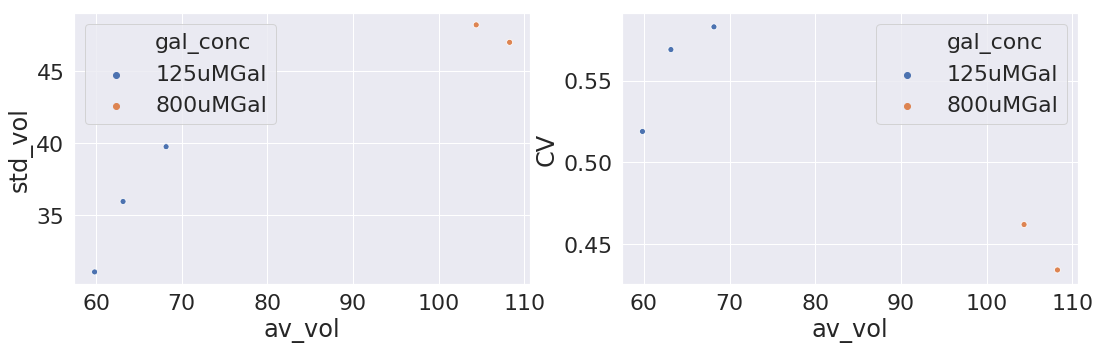

In [47]:
x=df1.genotype=='pGAL1-WHI5-mVenNB'
y=df1.ellipse_volume<200  # ensuring that we aren't studying cells that are arrested in G1
df2 = df1[x&y].groupby(['gal_conc', 'expt_id'])['ellipse_volume'].std()/df1[x&y].groupby(['gal_conc', 'expt_id'])['ellipse_volume'].mean()
temp_df=df2.reset_index()
temp_df['av_vol']=df1[x&y].groupby(['gal_conc', 'expt_id']).mean().reset_index()['ellipse_volume']
temp_df['std_vol']=df1[x&y].groupby(['gal_conc', 'expt_id']).std().reset_index()['ellipse_volume']
temp_df.columns=['gal_conc','expt_id','CV','av_vol','std_vol']
temp_df.head()
fig=plt.figure(figsize=[18,5])
plt.subplot(1,2,1)
sns.scatterplot(x='av_vol',y='std_vol',data=temp_df,hue='gal_conc')
plt.subplot(1,2,2)
sns.scatterplot(x='av_vol',y='CV',data=temp_df,hue='gal_conc')
plt.show()
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/scaling_analysis/timepoint_plot.png',dpi=300,bbox_inches='tight')
# plt.clf()

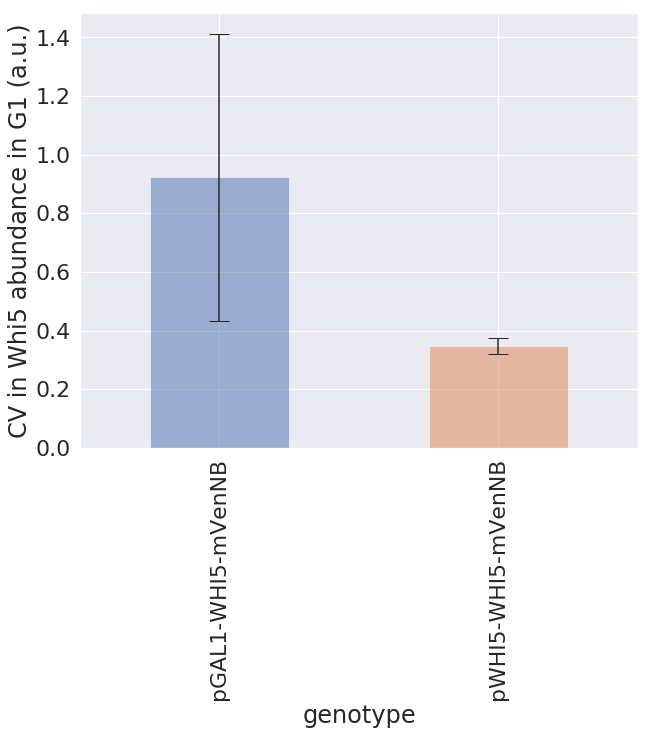

<Figure size 432x288 with 0 Axes>

In [10]:
x=df1.gal_conc=='125uMGal'
y=df1.ellipse_volume<200  # ensuring that we aren't studying cells that are arrested in G1
df2 = df1[x&y].groupby(['genotype', 'expt_id']).std()/df1[x&y].groupby(['genotype', 'expt_id']).mean()
temp_df=df2["pixel_thresh_fluor_vals"].groupby('genotype').mean()
temp_df1=df2["pixel_thresh_fluor_vals"].groupby('genotype').std(ddof=1)
sns.set(font_scale=2)
fig=plt.figure(figsize=[5,5])
temp_df.plot(kind='bar',yerr=temp_df1,capsize=10.0, figsize=[10,8],grid=True, alpha=.5)
plt.ylabel('CV in Whi5 abundance in G1 (a.u.)')
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/induction_validation/timepoint_G1_CV_F1_bar.png',dpi=500, bbox_inches='tight')
plt.show()
plt.clf()

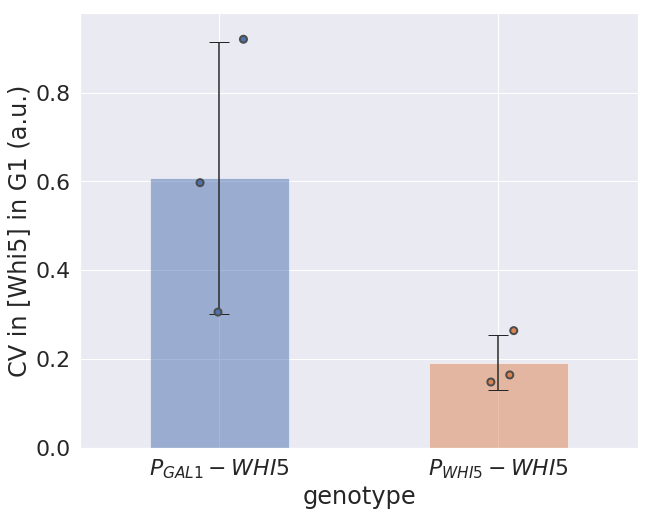

<Figure size 432x288 with 0 Axes>

In [17]:

x=df1.gal_conc=='125uMGal'
y=df1.ellipse_volume<200  # ensuring that we aren't studying cells that are arrested in G1
df2 = df1[x&y].groupby(['genotype', 'expt_id']).std()/df1[x&y].groupby(['genotype', 'expt_id']).mean()
sns.set(font_scale=2)
fig=plt.figure(figsize=[5,5])
var= 'pixel_thresh_fluor_vals_av'
temp_df=df2[var].groupby('genotype').mean()
temp_df1=df2[var].groupby('genotype').std(ddof=1)
g = sns.stripplot(x='genotype', y=var, data=df2.reset_index(), size=7, jitter=True, linewidth=2.0)
labels = ['$P_{GAL1}-WHI5$', '$P_{WHI5}-WHI5$']
temp_df.plot(kind='bar',yerr=temp_df1,capsize=10.0, figsize=[10,8],grid=True, alpha=.5)
g.set_xticklabels(labels, rotation=0)
plt.ylabel('CV in [Whi5] in G1 (a.u.)')
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/induction_validation/timepoint_G1_CV_F1conc_bar.png',dpi=500, bbox_inches='tight')
plt.show()
plt.clf()

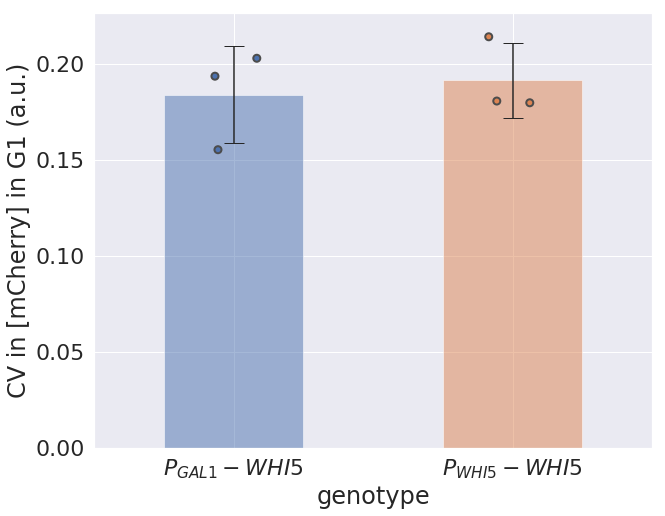

<Figure size 432x288 with 0 Axes>

In [20]:
x=df1.gal_conc=='125uMGal'
y=df1.ellipse_volume<200  # ensuring that we aren't studying cells that are arrested in G1
df2 = df1[x&y].groupby(['genotype', 'expt_id']).std()/df1[x&y].groupby(['genotype', 'expt_id']).mean()
sns.set(font_scale=2)
fig=plt.figure(figsize=[5,5])
var= 'pixel_thresh_fluor_vals_av_c2'
temp_df=df2[var].groupby('genotype').mean()
temp_df1=df2[var].groupby('genotype').std(ddof=1)
g = sns.stripplot(x='genotype', y=var, data=df2.reset_index(), size=7, jitter=True, linewidth=2.0)
labels = ['$P_{GAL1}-WHI5$', '$P_{WHI5}-WHI5$']
temp_df.plot(kind='bar',yerr=temp_df1,capsize=10.0, figsize=[10,8],grid=True, alpha=.5)
g.set_xticklabels(labels, rotation=0)
plt.ylabel('CV in [mCherry] in G1 (a.u.)')
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/induction_validation/timepoint_G1_CV_F2conc_bar.png',dpi=500, bbox_inches='tight')
plt.show()
plt.clf()

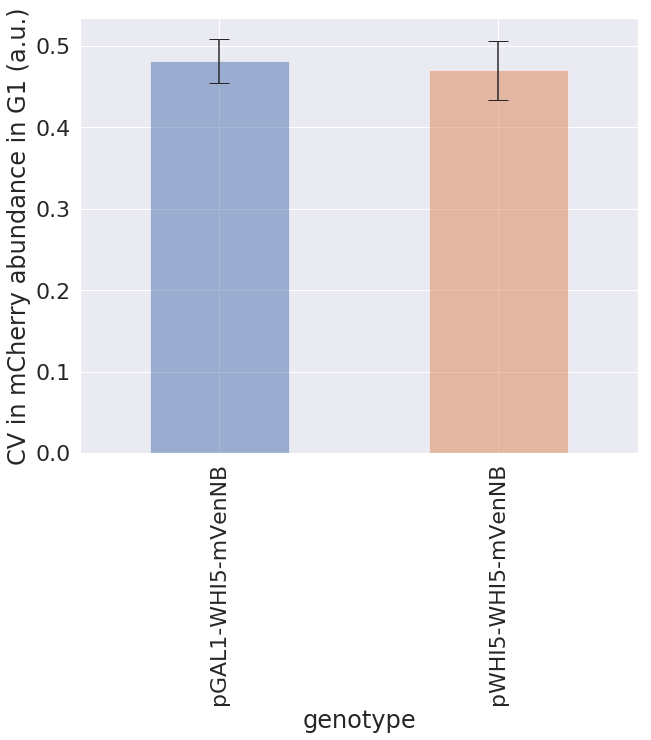

<Figure size 432x288 with 0 Axes>

In [30]:
x=df1.gal_conc=='125uMGal'
y=df1.ellipse_volume<200  # ensuring that we aren't studying cells that are arrested in G1
df2 = df1[x&y].groupby(['genotype', 'expt_id']).std()/df1[x&y].groupby(['genotype', 'expt_id']).mean()
temp_df=df2["pixel_thresh_fluor_vals_c2"].groupby('genotype').mean()
temp_df1=df2["pixel_thresh_fluor_vals_c2"].groupby('genotype').std()
sns.set(font_scale=2)
fig=plt.figure(figsize=[5,5])
temp_df.plot(kind='bar',yerr=temp_df1,capsize=10.0, figsize=[10,8],grid=True, alpha=.5)
plt.ylabel('CV in mCherry abundance in G1 (a.u.)')
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/induction_validation/timepoint_G1_CV_F2_bar.png',dpi=500, bbox_inches='tight')
plt.show()
plt.clf()

In [42]:
var = "ellipse_volume"
temp_df= df1.groupby(['Condition', 'expt_id'])[var].mean()
labels = temp_df.index.unique().levels[0]
print temp_df.head(20)
print 'P values for average of '+var
# temp_df.loc['Daughters, pWHI5-WHI5']
for i in range(len(labels)):
    for j in range(len(labels)):
        if i<j:
            print labels[i], labels[j]
            vals= scipy.stats.ttest_ind(temp_df.loc[labels[i]],temp_df.loc[labels[j]],equal_var=False)
#             print np.around(vals,3)
            if vals[1]<0.05:
                print 'Statistically significant difference'
                print np.around(vals,3)
            else:
                print 'No difference' 

Condition             expt_id          
pGAL1-WHI5, 125uMGal  /190322_timepoint     77.758669
                      /190403_timepoint     65.163499
                      /190417_timepoint     66.227884
pGAL1-WHI5, 800uMGal  /190322_timepoint    265.348973
                      /190607_timepoint    213.608920
                      /191009_timepoint    227.713625
pWHI5-WHI5, 125uMGal  /190322_timepoint     89.035599
                      /190403_timepoint     65.453432
                      /190417_timepoint     66.010703
pWHI5-WHI5, 800uMGal  /190322_timepoint     89.977212
                      /191009_timepoint     59.660939
Name: ellipse_volume, dtype: float64
P values for average of ellipse_volume
pGAL1-WHI5, 125uMGal pGAL1-WHI5, 800uMGal
Statistically significant difference
[-1.0391e+01  6.0000e-03]
pGAL1-WHI5, 125uMGal pWHI5-WHI5, 125uMGal
No difference
pGAL1-WHI5, 125uMGal pWHI5-WHI5, 800uMGal
No difference
pGAL1-WHI5, 800uMGal pWHI5-WHI5, 125uMGal
Statistically significant diffe

In [43]:
var = "pixel_thresh_fluor_vals_av"
temp_df= df1.groupby(['Condition', 'expt_id'])[var].mean()
labels = temp_df.index.unique().levels[0]
print temp_df.head(20)
print 'P values for average of '+var
# temp_df.loc['Daughters, pWHI5-WHI5']
for i in range(len(labels)):
    for j in range(len(labels)):
        if i<j:
            print labels[i], labels[j]
            vals= scipy.stats.ttest_ind(temp_df.loc[labels[i]],temp_df.loc[labels[j]],equal_var=False)
#             print np.around(vals,3)
            if vals[1]<0.05:
                print 'Statistically significant difference'
                print np.around(vals,3)
            else:
                print 'No difference'

Condition             expt_id          
pGAL1-WHI5, 125uMGal  /190322_timepoint     1.317329
                      /190403_timepoint     1.070200
                      /190417_timepoint     1.090593
pGAL1-WHI5, 800uMGal  /190322_timepoint     5.142495
                      /190607_timepoint    10.928826
                      /191009_timepoint     4.926680
pWHI5-WHI5, 125uMGal  /190322_timepoint     1.057935
                      /190403_timepoint     1.692917
                      /190417_timepoint     0.884071
pWHI5-WHI5, 800uMGal  /190322_timepoint     0.943137
                      /191009_timepoint     0.025710
Name: pixel_thresh_fluor_vals_av, dtype: float64
P values for average of pixel_thresh_fluor_vals_av
pGAL1-WHI5, 125uMGal pGAL1-WHI5, 800uMGal
No difference
pGAL1-WHI5, 125uMGal pWHI5-WHI5, 125uMGal
No difference
pGAL1-WHI5, 125uMGal pWHI5-WHI5, 800uMGal
No difference
pGAL1-WHI5, 800uMGal pWHI5-WHI5, 125uMGal
No difference
pGAL1-WHI5, 800uMGal pWHI5-WHI5, 800uMGal
No differen

In [34]:
var = "pixel_thresh_fluor_vals_av_c2"
temp_df= df1.groupby(['Condition', 'expt_id'])[var].mean()
labels = temp_df.index.unique().levels[0]
# print temp_df.head(20)
print 'P values for average of '+var
# temp_df.loc['Daughters, pWHI5-WHI5']
for i in range(len(labels)):
    for j in range(len(labels)):
        if i<j:
            print labels[i], labels[j]
            vals= scipy.stats.ttest_ind(temp_df.loc[labels[i]],temp_df.loc[labels[j]],equal_var=False)
#             print np.around(vals,3)
            if vals[1]<0.05:
                print 'Statistically significant difference'
                print np.around(vals,3)
            else:
                print 'No difference'

P values for average of pixel_thresh_fluor_vals_av_c2
pGAL1-WHI5, 125uMGal pGAL1-WHI5, 800uMGal
No difference
pGAL1-WHI5, 125uMGal pWHI5-WHI5, 125uMGal
No difference
pGAL1-WHI5, 125uMGal pWHI5-WHI5, 800uMGal
No difference
pGAL1-WHI5, 800uMGal pWHI5-WHI5, 125uMGal
No difference
pGAL1-WHI5, 800uMGal pWHI5-WHI5, 800uMGal
No difference
pWHI5-WHI5, 125uMGal pWHI5-WHI5, 800uMGal
No difference


In [29]:
print df1.genotype.unique()
print df1.gal_conc.unique()

['pGAL1-WHI5-mVenNB' 'pWHI5-WHI5-mVenNB']
['125uMGal' '800uMGal']


95.01895290063301 60.9090751419997
0.5429196208181957 65.2058502646195
Population measured,     CV, Average volume (fL)
Initial birth popn (sim), 0.56 48.33
Full Asynchronous popn (sim), 0.54 65.21
G1 Asynchronous popn (sim), 0.54 47.57
Experimental G1 cells, 0.56 70.02


<Figure size 432x288 with 0 Axes>

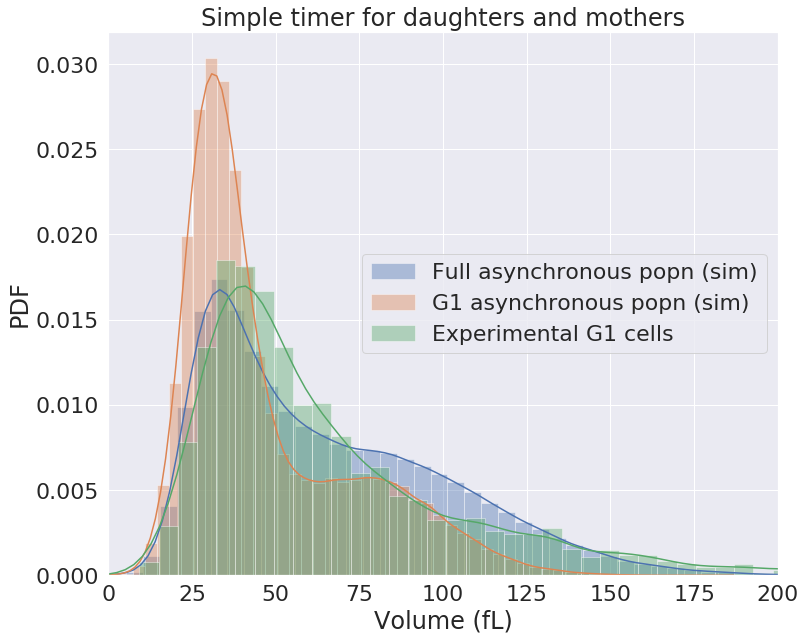

In [64]:
# Comparison of measured CV for simulations and cells in G1

# data for size distributions at birth and division times
plt.clf()
fig=plt.figure(figsize=[12,10])
cv_d=0.23844912372698643
cv_m=0.30051277404658344
mean_d=26.0062380974
mean_m=70.6620724479
td_d=222.397137746
td_m=133.148148148
tg1_d=122.28980322
tg1_m=37.5816993464
def find_gr(temp_d,temp_m):
    temp_gr=np.linspace(np.log(2)/temp_d,np.log(2)/temp_m,1000)
    temp_val=np.argmin(np.absolute(np.exp(-temp_gr*temp_d)+np.exp(-temp_gr*temp_m)-1))
#     fig=plt.plot(temp_gr,np.exp(-temp_gr*temp_d)+np.exp(-temp_gr*temp_m)-1)
    return temp_gr[temp_val]
ages_d=[]
ages_m=[]
vb_d=[]
vb_m=[]
gr=find_gr(td_d,td_m)
for ind in range(10**5):
    temp = np.random.exponential(scale=1/gr,size=1)[0]
    while temp>td_d:
        temp = np.random.exponential(scale=1/gr,size=1)[0]
    ages_d.append(temp)
    temp = np.random.exponential(scale=1/gr,size=1)[0]
    while temp>td_m:
        temp = np.random.exponential(scale=1/gr,size=1)[0]
    ages_m.append(temp)
    temp=np.random.normal(loc=mean_d,scale=cv_d*mean_d,size=1)[0]
    while temp<0:
        temp=np.random.normal(loc=mean_d,scale=cv_d*mean_d,size=1)[0]
    vb_d.append(temp)
    temp=np.random.normal(loc=mean_m,scale=cv_m*mean_m,size=1)[0]
    while temp<0:
        temp=np.random.normal(loc=mean_m,scale=cv_m*mean_m,size=1)[0]
    vb_m.append(temp)
m=np.exp(-gr*td_d)-np.exp(-gr*td_m)
nm=int(np.floor((1-m)*len(vb_d)/(1+m)))
vb_m_short=vb_m[:nm+1]
ages_m_short=ages_m[:nm+1]
print np.mean(ages_d),np.mean(ages_m_short)
vols = np.asarray(vb_d)*np.exp(gr*np.asarray(ages_d))
vols1 = np.asarray(vb_m_short)*np.exp(gr*np.asarray(ages_m_short))
output_vols=np.append(vols,vols1,axis=0)
g1_daughters=np.nonzero(np.asarray(ages_d)<tg1_d)
g1_mothers=np.nonzero(np.asarray(ages_m_short)<tg1_m)
g1_volumes=np.append(vols[g1_daughters],vols1[g1_mothers],axis=0)
print scipy.stats.variation(output_vols), np.mean(output_vols)
sns.distplot(output_vols,label='Full asynchronous popn (sim)')
sns.distplot(g1_volumes,label='G1 asynchronous popn (sim)')
# sns.distplot(vb_d,label='Daughters at birth')
# sns.distplot(vb_m,label='Mothers at birth')
# sns.distplot(v_init,label='Birth population')
# Now we plot actual biological data
x=df1['gal_conc']=='125uMGal'
y=df1['ellipse_volume']<300
z=df1['genotype']=='pGAL1-WHI5-mVenNB'
sns.distplot(df1[x&y&z]['ellipse_volume'],label='Experimental G1 cells')
plt.legend(loc='right')
plt.xlabel('Volume (fL)')
plt.ylabel('PDF')
plt.xlim(xmin=0,xmax=200)
plt.title('Simple timer for daughters and mothers')
print 'Population measured,     CV, Average volume (fL)'
print 'Initial birth popn (sim),', np.around(scipy.stats.variation(v_init),2), np.around(np.mean(v_init),2)
print 'Full Asynchronous popn (sim),', np.around(scipy.stats.variation(output_vols),2), np.around(np.mean(output_vols),2)
print 'G1 Asynchronous popn (sim),', np.around(scipy.stats.variation(g1_volumes),2), np.around(np.mean(g1_volumes),2)
y=df1['ellipse_volume']<200
print 'Experimental G1 cells,', np.around(scipy.stats.variation(df1[x&y&z]['ellipse_volume']),2), np.around(np.mean(df1[x&z]['ellipse_volume']),2)
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_distribution_perturbation/CV_comp_sims_timepoint.png',bbox_inches='tight',dpi=500)

# Comparison of Whi5 concentration for different conditions

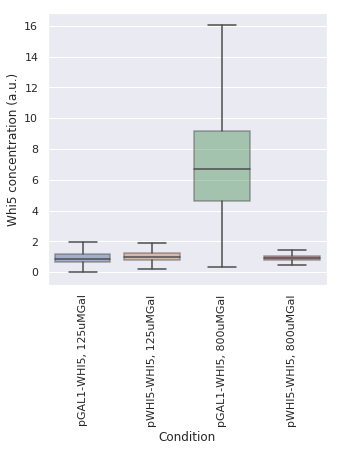

<Figure size 432x288 with 0 Axes>

In [89]:
# x=df1.gal_conc !='800uMGal'
sns.set(font_scale=1)
fig=plt.figure(figsize=[5,5])
sns_plot=sns.boxplot(x="Condition", y="pixel_thresh_fluor_vals_av", data=df1,showfliers=False, boxprops=dict(alpha=.5))
plt.ylabel('Whi5 concentration (a.u.)')
plt.xticks(rotation=90)
# plt.ylim(ymax=6000,ymin=0)
plt.show()
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/induction_validation/c1_G1_dist_timepoint_variable_gal.png',dpi=500, bbox_inches='tight')
plt.clf()

In [11]:
df1.columns

Index([u'area', u'cytoplasmic_fluor_av', u'cytoplasmic_fluor_av_c2',
       u'cytoplasmic_fluor_int', u'cytoplasmic_fluor_int_c2',
       u'ellipse_volume', u'frames', u'index_image', u'nuclear_fluor_av',
       u'nuclear_fluor_av_c2', u'nuclear_fluor_int', u'nuclear_fluor_int_c2',
       u'nuclear_vol', u'nuclear_whi5', u'pixel_thresh_fluor_vals',
       u'pixel_thresh_fluor_vals_c2', u'pixel_thresh_vol', u'zproj_fluor_vals',
       u'zproj_fluor_vals_c2', u'Strain', u'expt_id',
       u'pixel_thresh_fluor_vals_av', u'pixel_thresh_fluor_vals_av_c2',
       u'nucl_cyt_fluor_ratio', u'nucl_cyt_fluor_ratio_c2',
       u'nucl_cyt_vol_ratio', u'zproj_fluor_vals_conc', u'strain_num',
       u'gal_conc', u'genotype', u'Condition', u'Condition1'],
      dtype='object')

In [34]:
df1.columns

Index([u'area', u'cytoplasmic_fluor_av', u'cytoplasmic_fluor_av_c2',
       u'cytoplasmic_fluor_int', u'cytoplasmic_fluor_int_c2',
       u'ellipse_volume', u'frames', u'index_image', u'nuclear_fluor_av',
       u'nuclear_fluor_av_c2', u'nuclear_fluor_int', u'nuclear_fluor_int_c2',
       u'nuclear_vol', u'nuclear_whi5', u'pixel_thresh_fluor_vals',
       u'pixel_thresh_fluor_vals_c2', u'pixel_thresh_vol', u'zproj_fluor_vals',
       u'zproj_fluor_vals_c2', u'Strain', u'expt_id',
       u'pixel_thresh_fluor_vals_av', u'pixel_thresh_fluor_vals_av_c2',
       u'nucl_cyt_fluor_ratio', u'nucl_cyt_fluor_ratio_c2',
       u'nucl_cyt_vol_ratio', u'zproj_fluor_vals_conc', u'strain_num',
       u'gal_conc', u'genotype', u'Condition', u'Condition1', u'Condition2'],
      dtype='object')

In [35]:
x=df1.gal_conc=='125uMGal'
df2 = df1[x].groupby(['Condition', 'expt_id'])

In [27]:
print df1.groupby(['Condition', 'expt_id'])['pixel_thresh_fluor_vals_av'].mean()
temp_df1 = df2.std()['pixel_thresh_fluor_vals_av']
temp_df=temp_df1.groupby('Condition').mean()
temp_df1=temp_df1.groupby('Condition').std()
sns.set(font_scale=2)
fig=plt.figure(figsize=[5,5])
temp_df.plot(kind='bar',yerr=temp_df1,capsize=10.0, figsize=[10,8],grid=True, alpha=.5)
plt.ylabel('Std deviation in [Whi5] in G1 (a.u.)')
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/induction_validation/c1_G1_bar_timepoint_variable_gal_std.png',dpi=500, bbox_inches='tight')
plt.clf()

Condition             expt_id          
pGAL1-WHI5, 125uMGal  /190322_timepoint    1.317329
                      /190403_timepoint    0.912951
                      /190417_timepoint    0.930347
pGAL1-WHI5, 800uMGal  /190322_timepoint    5.142495
                      /190607_timepoint    9.323004
pWHI5-WHI5, 125uMGal  /190322_timepoint    1.057935
                      /190403_timepoint    1.444169
                      /190417_timepoint    0.754171
pWHI5-WHI5, 800uMGal  /190322_timepoint    0.943137
Name: pixel_thresh_fluor_vals_av, dtype: float64


<Figure size 720x576 with 0 Axes>

In [36]:
print df1.groupby(['Condition', 'expt_id'])['pixel_thresh_fluor_vals_av'].mean()
temp_df1 = df2.std()['pixel_thresh_fluor_vals_av']/df2.mean()["pixel_thresh_fluor_vals_av"]
temp_df=temp_df1.groupby('Condition').mean()
temp_df1=temp_df1.groupby('Condition').std()
sns.set(font_scale=2)
fig=plt.figure(figsize=[5,5])
temp_df.plot(kind='bar',yerr=temp_df1,capsize=10.0, figsize=[10,8],grid=True, alpha=.5)
plt.ylabel('CV in [Whi5] in G1 (a.u.)')
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/induction_validation/c1_G1_bar_timepoint_variable_gal_CV.png',dpi=500, bbox_inches='tight')
plt.clf()

Condition             expt_id          
pGAL1-WHI5, 125uMGal  /190322_timepoint    1.317329
                      /190403_timepoint    0.912951
                      /190417_timepoint    0.930347
pGAL1-WHI5, 800uMGal  /190322_timepoint    5.142495
                      /190607_timepoint    9.323004
pWHI5-WHI5, 125uMGal  /190322_timepoint    1.057935
                      /190403_timepoint    1.444169
                      /190417_timepoint    0.754171
pWHI5-WHI5, 800uMGal  /190322_timepoint    0.943137
Name: pixel_thresh_fluor_vals_av, dtype: float64


<Figure size 720x576 with 0 Axes>

In [37]:
# print df1.groupby(['Condition', 'expt_id'])['pixel_thresh_fluor_vals_av_c2'].mean()
temp_df1 = df2.std()['pixel_thresh_fluor_vals_av_c2']/df2.mean()["pixel_thresh_fluor_vals_av_c2"]
temp_df=temp_df1.groupby('Condition').mean()
temp_df1=temp_df1.groupby('Condition').std()
sns.set(font_scale=2)
fig=plt.figure(figsize=[5,5])
temp_df.plot(kind='bar',yerr=temp_df1,capsize=10.0, figsize=[10,8],grid=True, alpha=.5)
plt.ylabel('CV in [mCherry] in G1')
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/induction_validation/c2_G1_bar_timepoint_variable_gal_CV.png',dpi=500, bbox_inches='tight')
plt.clf()

<Figure size 720x576 with 0 Axes>

In [26]:
# print df1.groupby(['Condition', 'expt_id'])['pixel_thresh_fluor_vals_av_c2'].mean()
temp_df1 = df2.std()['pixel_thresh_fluor_vals_av']/df2.mean()["pixel_thresh_fluor_vals_av"]
temp_df=temp_df1.groupby('Condition').mean()
temp_df1=temp_df1.groupby('Condition').std()
sns.set(font_scale=2)
fig=plt.figure(figsize=[5,5])
temp_df.plot(kind='bar',yerr=temp_df1,capsize=10.0, figsize=[10,8],grid=True, alpha=.5)
plt.ylabel('CV in [Whi5] in G1')
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/induction_validation/c1_G1_bar_timepoint_variable_gal_CV.png',dpi=500, bbox_inches='tight')
plt.clf()

<Figure size 720x576 with 0 Axes>

Condition             expt_id          
pGAL1-WHI5, 125uMGal  /190322_timepoint    1.317329
                      /190403_timepoint    0.912951
                      /190417_timepoint    0.930347
pGAL1-WHI5, 800uMGal  /190322_timepoint    5.142495
                      /190607_timepoint    9.323004
pWHI5-WHI5, 125uMGal  /190322_timepoint    1.057935
                      /190403_timepoint    1.444169
                      /190417_timepoint    0.754171
pWHI5-WHI5, 800uMGal  /190322_timepoint    0.943137
Name: pixel_thresh_fluor_vals_av, dtype: float64


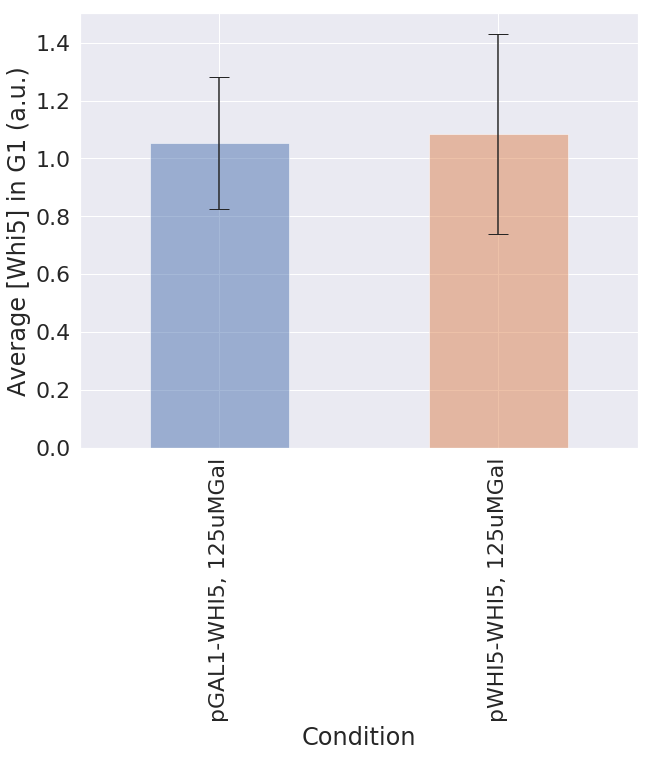

<Figure size 432x288 with 0 Axes>

In [25]:
x=df1.gal_conc=='125uMGal'
df2 = df1[x].groupby(['Condition', 'expt_id'])
print df1.groupby(['Condition', 'expt_id'])['pixel_thresh_fluor_vals_av'].mean()
temp_df=df2.mean()["pixel_thresh_fluor_vals_av"].groupby('Condition').mean()
temp_df1=df2.mean()["pixel_thresh_fluor_vals_av"].groupby('Condition').std()
sns.set(font_scale=2)
fig=plt.figure(figsize=[5,5])
temp_df.plot(kind='bar',yerr=temp_df1,capsize=10.0, figsize=[10,8],grid=True, alpha=.5)
plt.ylabel('Average [Whi5] in G1 (a.u.)')
plt.show()
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/induction_validation/c1_G1_bar_timepoint_variable_gal.png',dpi=500, bbox_inches='tight')
plt.clf()

In [26]:
temp_df=df2.mean()["ellipse_volume"].groupby('Condition').mean()
temp_df1=df2.mean()["ellipse_volume"].groupby('Condition').std()
# plot = temp1.plot(x='label',y='slope',kind='bar',legend=False,yerr=temp2,capsize=10.0, figsize=[10,8],grid=True,rot=False)
sns.set(font_scale=2)
fig=plt.figure(figsize=[5,5])
temp_df.plot(kind='bar',yerr=temp_df1,capsize=10.0, figsize=[10,8],grid=True, alpha=.5)
plt.ylabel('Average volume in G1 (fL)')
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/induction_validation/vol_G1_bar_timepoint_variable_gal.png',dpi=500, bbox_inches='tight')
plt.clf()

<Figure size 720x576 with 0 Axes>

In [20]:
temp_df=df2.mean()["pixel_thresh_fluor_vals_av_c2"].groupby('Condition').mean()
temp_df1=df2.mean()["pixel_thresh_fluor_vals_av_c2"].groupby('Condition').std()
# plot = temp1.plot(x='label',y='slope',kind='bar',legend=False,yerr=temp2,capsize=10.0, figsize=[10,8],grid=True,rot=False)
sns.set(font_scale=2)
fig=plt.figure(figsize=[5,5])
temp_df.plot(kind='bar',yerr=temp_df1,capsize=10.0, figsize=[10,8],grid=True, alpha=.5)
plt.ylabel('Average [mCherry] in G1 (a.u.)')
plt.show()
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/induction_validation/c2_G1_bar_timepoint_variable_gal.png',dpi=500, bbox_inches='tight')
plt.clf()

<Figure size 720x576 with 0 Axes>

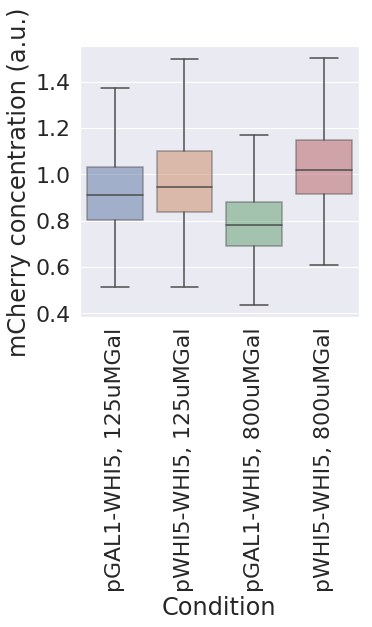

<Figure size 432x288 with 0 Axes>

In [39]:
y=df1.nuclear_whi5==1
fig=plt.figure(figsize=[5,5])
sns_plot=sns.boxplot(x="Condition", y="pixel_thresh_fluor_vals_av_c2",data=df1[y], boxprops=dict(alpha=.5),showfliers=False)
plt.ylabel('mCherry concentration (a.u.)')
plt.xticks(rotation=90)
# plt.ylim(ymax=6000,ymin=0)
plt.show()
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/induction_validation/c2_G1_dist_timepoint_variable_gal.png',dpi=500, bbox_inches='tight')
plt.clf()

# Concentration of fluorescence distribution statistics

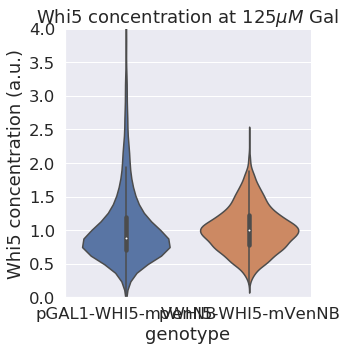

In [511]:
x=df1.gal_conc !='800uMGal'
y=df1.nuclear_whi5==1
# z = df1.expt_id !='/190322_timepoint'
sns_plot=sns.catplot(x="genotype", y="pixel_thresh_fluor_vals_av", kind="violin", data=df1[x&y])
plt.ylabel('Whi5 concentration (a.u.)')
plt.ylim(ymax=4,ymin=0)
plt.title('Whi5 concentration at 125$\mu M$ Gal')
plt.show()
sns_plot.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/induction_validation/c1b_dist_timepoint.png',dpi=500)

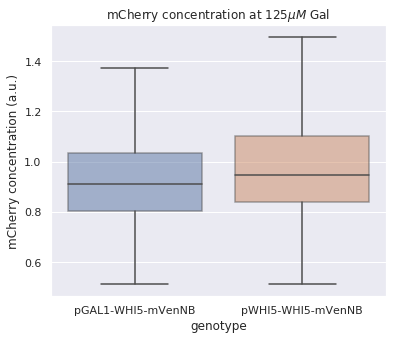

In [21]:
x=df1.gal_conc !='800uMGal'
y=df1.nuclear_whi5==1
# z = df1.expt_id !='/190322_timepoint'
fig=plt.figure(figsize=[6,5])
sns_plot=sns.boxplot(x="genotype", y="pixel_thresh_fluor_vals_av_c2", data=df1[x&y],showfliers=False, boxprops=dict(alpha=.5))
plt.ylabel('mCherry concentration (a.u.)')
plt.title('mCherry concentration at 125$\mu M$ Gal')
# plt.ylim(ymax=6000,ymin=0)
plt.show()
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/induction_validation/c2b_dist_timepoint.png',dpi=500,bbox_inches='tight')

In [513]:
df1.Condition.unique()

array(['pGAL1-WHI5, 125uMGal', 'pWHI5-WHI5, 125uMGal',
       'pGAL1-WHI5, 800uMGal', 'pWHI5-WHI5, 800uMGal'], dtype=object)

In [514]:
# x=df1.gal_conc !='800uMGal'
y=df1.nuclear_whi5==1
np.around(df1[y].groupby(['genotype','gal_conc'])['pixel_thresh_fluor_vals_av'].describe(),2)

count  mean   std   min   25%   50%   75%    max
genotype          gal_conc                                                   
pGAL1-WHI5-mVenNB 125uMGal  4361.0  1.06  0.72 -0.01  0.70  0.88  1.20  12.09
                  800uMGal  4776.0  7.14  3.28  0.35  4.64  6.73  9.19  23.23
pWHI5-WHI5-mVenNB 125uMGal  4449.0  1.02  0.34  0.20  0.78  1.00  1.22   2.42
                  800uMGal  1513.0  0.94  0.19  0.39  0.81  0.94  1.06   1.73

In [515]:
# x=df1.gal_conc !='800uMGal'
y=df1.nuclear_whi5==1
np.around(df1[y].groupby(['genotype','gal_conc'])['pixel_thresh_fluor_vals_av_c2'].describe(),2)

count  mean   std   min   25%   50%   75%   max
genotype          gal_conc                                                  
pGAL1-WHI5-mVenNB 125uMGal  4361.0  0.93  0.18  0.07  0.80  0.91  1.03  2.04
                  800uMGal  4776.0  0.80  0.16  0.07  0.69  0.78  0.88  1.82
pWHI5-WHI5-mVenNB 125uMGal  4449.0  0.99  0.22  0.07  0.84  0.95  1.10  2.64
                  800uMGal  1513.0  1.03  0.18  0.18  0.91  1.02  1.15  2.04

In [541]:
aggregate = {'CV':lambda x: np.std(x)/np.mean(x), 'standard deviation':'std','median':'median', 'mean':'mean', 'count':'count'}
np.around(df1[y].groupby(['genotype','gal_conc']).agg({'pixel_thresh_fluor_vals_av':aggregate, 'pixel_thresh_fluor_vals_av_c2':aggregate}),2)

pixel_thresh_fluor_vals_av_c2                     \
                                      standard deviation count median    CV   
genotype          gal_conc                                                    
pGAL1-WHI5-mVenNB 125uMGal                          0.18  4361   0.91  0.20   
                  800uMGal                          0.16  4776   0.78  0.20   
pWHI5-WHI5-mVenNB 125uMGal                          0.22  4449   0.95  0.23   
                  800uMGal                          0.18  1513   1.02  0.18   

                                 pixel_thresh_fluor_vals_av               \
                            mean         standard deviation count median   
genotype          gal_conc                                                 
pGAL1-WHI5-mVenNB 125uMGal  0.93                       0.72  4361   0.88   
                  800uMGal  0.80                       3.28  4776   6.73   
pWHI5-WHI5-mVenNB 125uMGal  0.99                       0.34  4449   1.00   
                  800uMGal  1.03                       0.19  1513   0.94   

                                        
                              CV  mean  
genotype          gal_conc              
pGAL1-WHI5-mVenNB 125uMGal  0.68  1.06  
                  800uMGal  0.46  7.14  
pWHI5-WHI5-mVenNB 125uMGal  0.33  1.02  
                  800uMGal  0.20  0.94

# Volume distributions

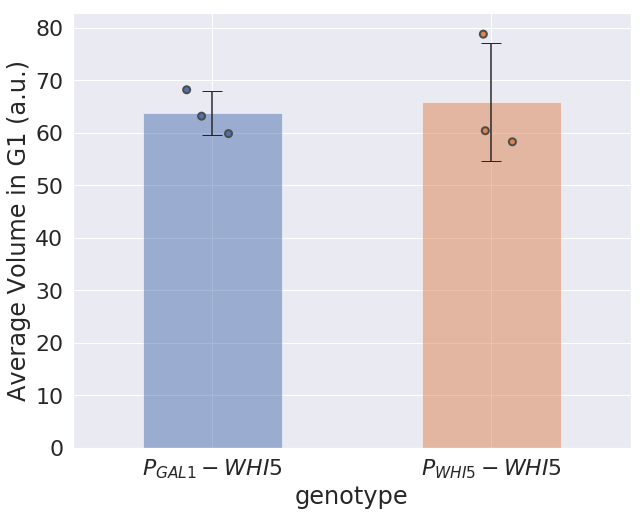

<Figure size 432x288 with 0 Axes>

In [21]:
x=df1.gal_conc=='125uMGal'
y=df1.ellipse_volume<200  # ensuring that we aren't studying cells that are arrested in G1
df2 = df1[x&y].groupby(['genotype', 'expt_id']).mean()
sns.set(font_scale=2)
fig=plt.figure(figsize=[5,5])
var= 'ellipse_volume'
temp_df=df2[var].groupby('genotype').mean()
temp_df1=df2[var].groupby('genotype').std(ddof=1)
g = sns.stripplot(x='genotype', y=var, data=df2.reset_index(), size=7, jitter=True, linewidth=2.0)
labels = ['$P_{GAL1}-WHI5$', '$P_{WHI5}-WHI5$']
temp_df.plot(kind='bar',yerr=temp_df1,capsize=10.0, figsize=[10,8],grid=True, alpha=.5)
g.set_xticklabels(labels, rotation=0)
plt.ylabel('Average Volume in G1 (a.u.)')
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_distribution_perturbation/timepoint_G1_volume_bar.png',dpi=500, bbox_inches='tight')
plt.show()
plt.clf()

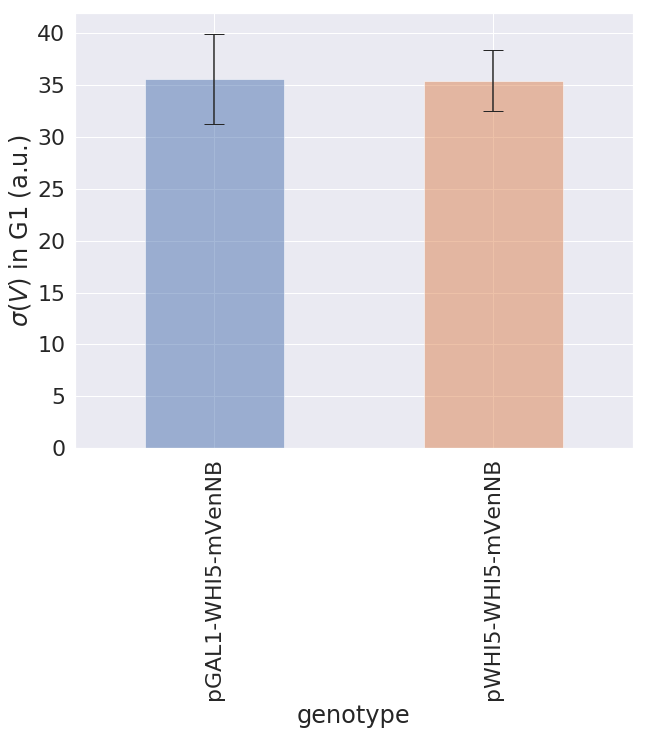

<Figure size 432x288 with 0 Axes>

In [7]:
x=df1.gal_conc=='125uMGal'
y=df1.ellipse_volume<200  # ensuring that we aren't studying cells that are arrested in G1
temp_df2 = df1[x&y].groupby(['genotype', 'expt_id'])
df2=temp_df2.std()
temp_df=df2["ellipse_volume"].groupby('genotype').mean()
temp_df1=df2["ellipse_volume"].groupby('genotype').std()
sns.set(font_scale=2)
fig=plt.figure(figsize=[5,5])
temp_df.plot(kind='bar',yerr=temp_df1,capsize=10.0, figsize=[10,8],grid=True, alpha=.5)
plt.ylabel(r'$\sigma(V)$ in G1 (a.u.)')
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_distribution_perturbation/timepoint_G1_volume_Std_bar.png',dpi=500, bbox_inches='tight')
plt.show()
plt.clf()

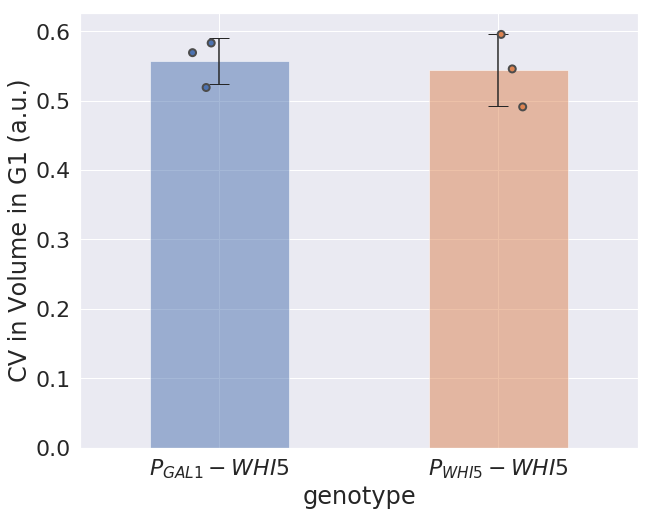

<Figure size 432x288 with 0 Axes>

In [22]:
x=df1.gal_conc=='125uMGal'
y=df1.ellipse_volume<200  # ensuring that we aren't studying cells that are arrested in G1
temp_df2 = df1[x&y].groupby(['genotype', 'expt_id'])
df2=temp_df2.std()/temp_df2.mean()
sns.set(font_scale=2)
fig=plt.figure(figsize=[5,5])
var= 'ellipse_volume'
temp_df=df2[var].groupby('genotype').mean()
temp_df1=df2[var].groupby('genotype').std(ddof=1)
g = sns.stripplot(x='genotype', y=var, data=df2.reset_index(), size=7, jitter=True, linewidth=2.0)
labels = ['$P_{GAL1}-WHI5$', '$P_{WHI5}-WHI5$']
temp_df.plot(kind='bar',yerr=temp_df1,capsize=10.0, figsize=[10,8],grid=True, alpha=.5)
g.set_xticklabels(labels, rotation=0)
plt.ylabel('CV in Volume in G1 (a.u.)')
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_distribution_perturbation/timepoint_G1_volume_CV_bar.png',dpi=500, bbox_inches='tight')
plt.show()
plt.clf()

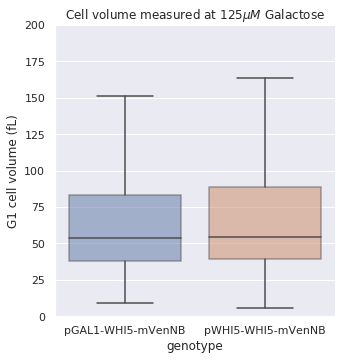

In [22]:
sns.set(font_scale=1.0)
x=df1.gal_conc !='800uMGal'
y=df1.nuclear_whi5==1
# fig=plt.figure(figsize=[5,5])
sns_plot=sns.catplot(x='genotype', y='ellipse_volume',kind='box',data=df1[x&y],showfliers=False, boxprops=dict(alpha=.5))
# plt.ylim(ymax=1.0)
plt.ylabel('G1 cell volume (fL)')
plt.ylim(ymin=0,ymax=200)
plt.title('Cell volume measured at $125\mu M$ Galactose')
sns_plot.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_distribution_perturbation/timepoint_G1_volume.png',dpi=500,bbox_inches='tight')
# plt.clf()

In [522]:
df1.expt_id.unique()

array(['/190403_timepoint', '/190417_timepoint', '/190607_timepoint',
       '/190322_timepoint'], dtype=object)

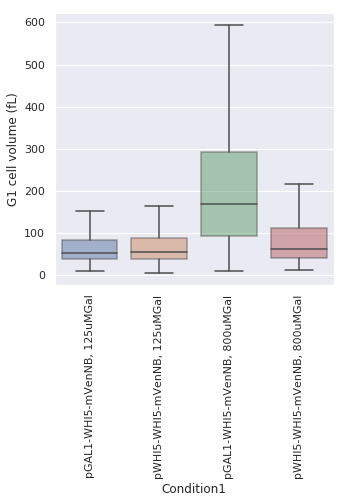

In [7]:
# x=df1.expt_id =='/190322_timepoint'
sns.set(font_scale=1.0)
y=df1.nuclear_whi5==1
fig=plt.figure(figsize=[5,5])
sns_plot=sns.boxplot(x='Condition1', y='ellipse_volume',data=df1[y],showfliers=False, boxprops=dict(alpha=.5))
# plt.ylim(ymax=1.0)
plt.xticks(rotation=90)
plt.ylabel('G1 cell volume (fL)')
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_distribution_perturbation/timepoint_G1_volume_variable_gal.png',dpi=500,bbox_inches='tight')

In [524]:
df1[df1.nuclear_whi5==1].groupby('Condition')['ellipse_volume'].median()

Condition
pGAL1-WHI5, 125uMGal     53.531916
pGAL1-WHI5, 800uMGal    169.516457
pWHI5-WHI5, 125uMGal     54.279710
pWHI5-WHI5, 800uMGal     62.039549
Name: ellipse_volume, dtype: float64

In [548]:
x=np.random.normal(0,1,size=[10,10])>0
y=np.nonzero(x)

In [551]:
print zip(*y)

[(0, 7), (0, 8), (1, 0), (1, 1), (1, 2), (1, 5), (1, 8), (2, 0), (2, 2), (2, 6), (2, 8), (2, 9), (3, 1), (3, 2), (3, 4), (3, 5), (3, 6), (3, 7), (3, 9), (4, 0), (4, 1), (4, 3), (4, 6), (4, 8), (5, 0), (5, 1), (5, 3), (5, 4), (5, 5), (5, 6), (5, 8), (5, 9), (6, 3), (6, 4), (6, 6), (7, 1), (7, 2), (7, 4), (7, 6), (7, 7), (7, 8), (8, 1), (8, 2), (8, 4), (8, 6), (8, 9), (9, 5), (9, 8)]


In [542]:
np.around(df1[y].groupby(['genotype','gal_conc']).agg({'ellipse_volume':aggregate}),2)

ellipse_volume                            
                           standard deviation count  median    CV    mean
genotype          gal_conc                                               
pGAL1-WHI5-mVenNB 125uMGal              53.92  4361   53.53  0.77   70.02
                  800uMGal             289.11  4776  169.52  1.20  240.67
pWHI5-WHI5-mVenNB 125uMGal              64.17  4449   54.28  0.87   73.56
                  800uMGal             106.96  1513   62.04  1.19   89.98

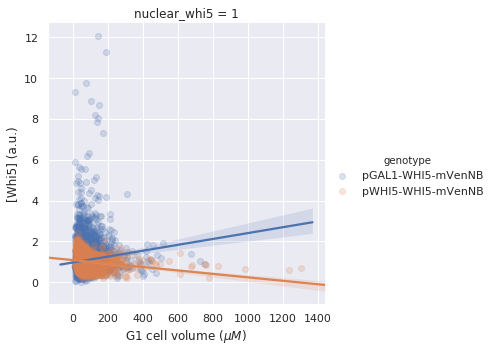

In [526]:
sns.set(font_scale=1.0)
y=df1.nuclear_whi5==1
z=df1.gal_conc=='125uMGal'
sns_plot = sns.lmplot(x='ellipse_volume', y='pixel_thresh_fluor_vals_av', hue='genotype', data=df1[y&z], col='nuclear_whi5', scatter_kws={'alpha': 0.2})
# plt.ylim(ymax=5000)
plt.ylabel('[Whi5] (a.u.)')
plt.xlabel('G1 cell volume ($\mu M$)')
sns_plot.savefig("./tester_fig.png", dpi=500)

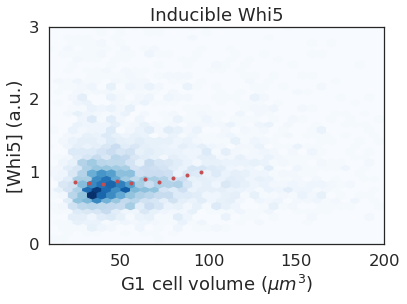

In [527]:
sns.set(font_scale=1.5)
y=df1.nuclear_whi5==1
z=df1.gal_conc=='125uMGal'
x=df1.expt_id!='/190322_timepoint'
x1 = df1.pixel_thresh_fluor_vals_av<3.0
x2 = df1.ellipse_volume<200
x3 = df1.genotype == 'pGAL1-WHI5-mVenNB'
bins = scipy.stats.binned_statistic(df1[x1&x2&x3&y&z].ellipse_volume, df1[x1&x2&x3&y&z].pixel_thresh_fluor_vals_av,statistic='median',range=(20,100))
with sns.axes_style("white"):
    fig = plt.hexbin(x='ellipse_volume', y='pixel_thresh_fluor_vals_av', data=df1[x1&x2&x3&y&z],cmap='Blues',mincnt=0,gridsize=35)
    plt.xlabel('G1 cell volume ($\mu m^3$)')
    plt.ylabel('[Whi5] (a.u.)')
    plt.plot((bins.bin_edges[1:]+bins.bin_edges[:-1])/2,bins.statistic,'.',color='r')
    plt.title('Inducible Whi5')
# plt.xlim(xmin=0,xmax=200)
# plt.ylabel()
# plt.legend()
# plt.xlabel()
# plt.title('Whi5 Concentration (a.u.) vs. cell volume for G1 cells')
# sns_plot.savefig("/home/felix/Dropbox/19_whi5_dilution_paper/plots/correlations_perturbation/Whi5_conc_pert.png")

In [18]:
df1.genotype.unique()

array(['pGAL1-WHI5-mVenNB', 'pWHI5-WHI5-mVenNB'], dtype=object)

In [32]:
bp = '/home/felix/Dropbox/19_whi5_dilution_paper/plots/correlations_perturbation/'
titles={'pGAL1-WHI5-mVenNB':r'$P_{GAL1}$ perturbed cells','pWHI5-WHI5-mVenNB':r'$P_{WHI5}$ unperturbed cells'}

y1, w1,z1=1,'125uMGal','pWHI5-WHI5-mVenNB'
x1 = df1.pixel_thresh_fluor_vals_av<4.0
x2 = df1.ellipse_volume<200
w11 = df1.gal_conc == w1
temp_xv,temp_yv,save_ext='ellipse_volume','pixel_thresh_fluor_vals_av','c1_vb_timepoint'
temp_xlab, temp_ylab = 'G1 volume (fL)', '[Whi5] (a.u.)'
bin_range=(10,180)
y,z,save_path=df1.nuclear_whi5==y1,df1.genotype==z1,bp+str(y1)+'_'+z1[:5]+'_'+save_ext+'.png'
fig=c.plotting_heatmap(temp_xv,temp_yv,df1[y&z&x1&x2&w11],bin_range,xlab=temp_xlab,ylab=temp_ylab,temp_title=titles[z1],gridsize=30)
fig.savefig(save_path,bbox_inches='tight',dpi=500)
plt.clf()

<Figure size 432x288 with 0 Axes>

In [27]:
print sum(x1),sum(x2),sum(w11)

11120 22977 16810


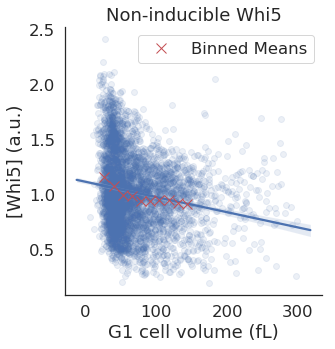

In [528]:
sns.set(font_scale=1.5)
y=df1.nuclear_whi5==1
z=df1.gal_conc=='125uMGal'
x1 = df1.pixel_thresh_fluor_vals_av<4.0
x2 = df1.ellipse_volume<300
x3 = df1.genotype == 'pWHI5-WHI5-mVenNB'
bins = scipy.stats.binned_statistic(df1[x1&x2&x3&y&z].ellipse_volume, df1[x1&x2&x3&y&z].pixel_thresh_fluor_vals_av,statistic='mean',range=(20,150))
with sns.axes_style("white"):
#     fig = plt.hexbin(x='ellipse_volume', y='pixel_thresh_fluor_vals_av', data=df1[x1&x2&x3&y&z],cmap='Blues',mincnt=0,gridsize=35)
    fig=sns.lmplot(x='ellipse_volume', y='pixel_thresh_fluor_vals_av', data=df1[x1&x2&x3&y&z], scatter_kws={'alpha': 0.1})
    plt.xlabel('G1 cell volume (fL)')
    plt.ylabel('[Whi5] (a.u.)')
    plt.plot((bins.bin_edges[1:]+bins.bin_edges[:-1])/2,bins.statistic,'.',color='r',marker='x',label='Binned Means',markersize=10)
    plt.title('Non-inducible Whi5')
    plt.legend()
# plt.xlim(xmin=0,xmax=200)
# plt.ylabel()
# plt.legend()
# plt.xlabel()
# plt.title('Whi5 Concentration (a.u.) vs. cell volume for G1 cells')
fig.savefig("/home/felix/Dropbox/19_whi5_dilution_paper/plots/correlations_perturbation/Whi5_conc_unpert1.png",dpi=500)

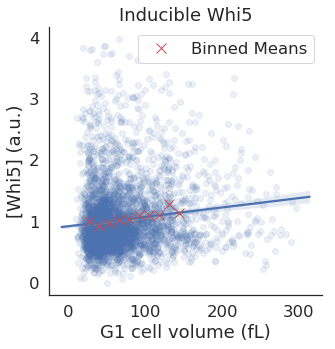

In [530]:
sns.set(font_scale=1.5)
y=df1.nuclear_whi5==1
z=df1.gal_conc=='125uMGal'
x1 = df1.pixel_thresh_fluor_vals_av<4.0
x2 = df1.ellipse_volume<300
x3 = df1.genotype == 'pGAL1-WHI5-mVenNB'
bins = scipy.stats.binned_statistic(df1[x1&x2&x3&y&z].ellipse_volume, df1[x1&x2&x3&y&z].pixel_thresh_fluor_vals_av,statistic='mean',range=(20,150))
with sns.axes_style("white"):
#     fig = plt.hexbin(x='ellipse_volume', y='pixel_thresh_fluor_vals_av', data=df1[x1&x2&x3&y&z],cmap='Blues',mincnt=0,gridsize=35)
    fig=sns.lmplot(x='ellipse_volume', y='pixel_thresh_fluor_vals_av', data=df1[x1&x2&x3&y&z], scatter_kws={'alpha': 0.1})
    plt.xlabel('G1 cell volume (fL)')
    plt.ylabel('[Whi5] (a.u.)')
    plt.plot((bins.bin_edges[1:]+bins.bin_edges[:-1])/2,bins.statistic,'.',color='r',marker='x',markersize=10,label='Binned Means')
    plt.title('Inducible Whi5')
    plt.legend()
# plt.xlim(xmin=0,xmax=200)
# plt.ylabel()
# plt.legend()
# plt.xlabel()
# plt.title('Whi5 Concentration (a.u.) vs. cell volume for G1 cells')
fig.savefig("/home/felix/Dropbox/19_whi5_dilution_paper/plots/correlations_perturbation/Whi5_conc_pert1.png",dpi=500)

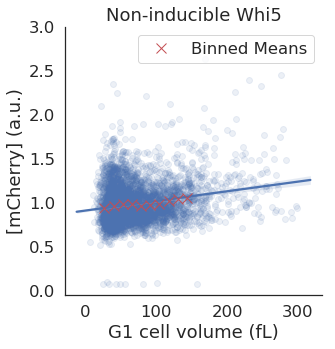

In [531]:
sns.set(font_scale=1.5)
y=df1.nuclear_whi5==1
z=df1.gal_conc=='125uMGal'
x1 = df1.pixel_thresh_fluor_vals_av<4.0
x2 = df1.ellipse_volume<300
x3 = df1.genotype == 'pWHI5-WHI5-mVenNB'
bins = scipy.stats.binned_statistic(df1[x1&x2&x3&y&z].ellipse_volume, df1[x1&x2&x3&y&z].pixel_thresh_fluor_vals_av_c2,statistic='mean',range=(20,150))
with sns.axes_style("white"):
#     fig = plt.hexbin(x='ellipse_volume', y='pixel_thresh_fluor_vals_av', data=df1[x1&x2&x3&y&z],cmap='Blues',mincnt=0,gridsize=35)
    fig=sns.lmplot(x='ellipse_volume', y='pixel_thresh_fluor_vals_av_c2', data=df1[x1&x2&x3&y&z], scatter_kws={'alpha': 0.1})
    plt.xlabel('G1 cell volume (fL)')
    plt.ylabel('[mCherry] (a.u.)')
    plt.plot((bins.bin_edges[1:]+bins.bin_edges[:-1])/2,bins.statistic,'.',color='r',marker='x',label='Binned Means',markersize=10)
    plt.title('Non-inducible Whi5')
    plt.ylim(ymax=3.0)
    plt.legend()
# plt.xlim(xmin=0,xmax=200)
# plt.ylabel()
# plt.legend()
# plt.xlabel()
# plt.title('Whi5 Concentration (a.u.) vs. cell volume for G1 cells')
fig.savefig("/home/felix/Dropbox/19_whi5_dilution_paper/plots/correlations_perturbation/mCherry_conc_unpert1.png",dpi=500)

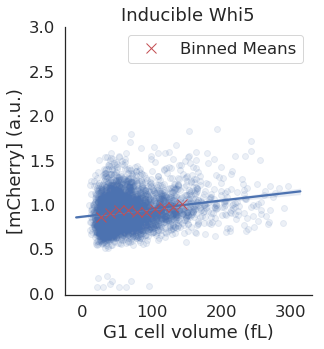

In [532]:
sns.set(font_scale=1.5)
y=df1.nuclear_whi5==1
z=df1.gal_conc=='125uMGal'
x1 = df1.pixel_thresh_fluor_vals_av<4.0
x2 = df1.ellipse_volume<300
x3 = df1.genotype == 'pGAL1-WHI5-mVenNB'
bins = scipy.stats.binned_statistic(df1[x1&x2&x3&y&z].ellipse_volume, df1[x1&x2&x3&y&z].pixel_thresh_fluor_vals_av_c2,statistic='mean',range=(20,150))
with sns.axes_style("white"):
#     fig = plt.hexbin(x='ellipse_volume', y='pixel_thresh_fluor_vals_av', data=df1[x1&x2&x3&y&z],cmap='Blues',mincnt=0,gridsize=35)
    fig=sns.lmplot(x='ellipse_volume', y='pixel_thresh_fluor_vals_av_c2', data=df1[x1&x2&x3&y&z], scatter_kws={'alpha': 0.1})
    plt.xlabel('G1 cell volume (fL)')
    plt.ylabel('[mCherry] (a.u.)')
    plt.plot((bins.bin_edges[1:]+bins.bin_edges[:-1])/2,bins.statistic,'.',color='r',marker='x',label='Binned Means',markersize=10)
    plt.title('Inducible Whi5')
    plt.legend()
    plt.ylim(ymax=3.0)
# plt.ylabel()
# plt.legend()
# plt.xlabel()
# plt.title('Whi5 Concentration (a.u.) vs. cell volume for G1 cells')
fig.savefig("/home/felix/Dropbox/19_whi5_dilution_paper/plots/correlations_perturbation/mCherry_conc_pert1.png",dpi=500)

(0, 400)

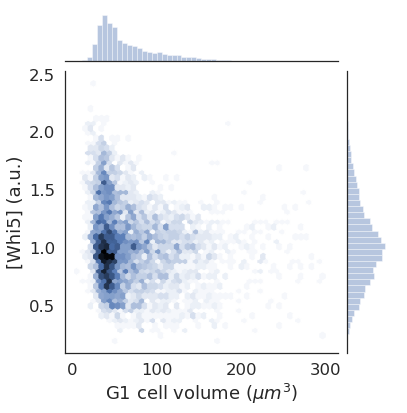

In [535]:
sns.set(font_scale=1.5)
y=df1.nuclear_whi5==1
z=df1.gal_conc=='125uMGal'
x=df1.expt_id!='/190322_timepoint'
x1 = df1.pixel_thresh_fluor_vals_av<4.0
x2 = df1.ellipse_volume<300
x3 = df1.genotype == 'pWHI5-WHI5-mVenNB'
with sns.axes_style("white"):
    sns_plot = (sns.jointplot(x='ellipse_volume', y='pixel_thresh_fluor_vals_av', data=df1[x1&x2&x3&y&z], kind="hex", color="b")
                .set_axis_labels('G1 cell volume ($\mu m^3$)', '[Whi5] (a.u.)'))
plt.xlim(xmin=0,xmax=400)
# plt.ylabel()
# plt.legend()
# plt.xlabel()
# plt.title('Whi5 Concentration (a.u.) vs. cell volume for G1 cells')
# sns_plot.savefig("/home/felix/Dropbox/19_whi5_dilution_paper/plots/correlations_perturbation/Whi5_conc_unpert.png")

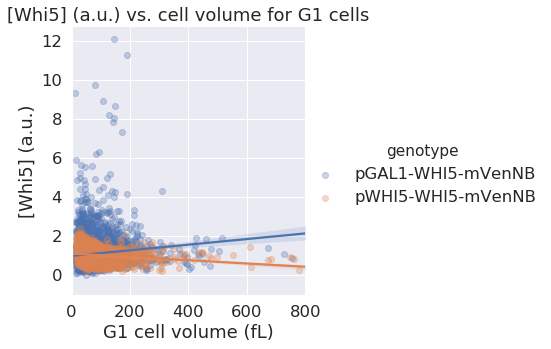

In [536]:
y=df1.nuclear_whi5==1
z=df1.gal_conc=='125uMGal'
sns.set(font_scale=1.5)
x=df1.expt_id!='/190322_timepoint'
sns_plot = sns.lmplot(x='ellipse_volume', y='pixel_thresh_fluor_vals_av', hue='genotype', data=df1[y&z], scatter_kws={'alpha': 0.3})
# plt.ylim(ymax=3000)
plt.xlim(xmin=0,xmax=800)
plt.ylabel('[Whi5] (a.u.)')
plt.xlabel('G1 cell volume (fL)')
plt.title('[Whi5] (a.u.) vs. cell volume for G1 cells')
sns_plot.savefig("/home/felix/Dropbox/19_whi5_dilution_paper/plots/correlations_perturbation/Whi5_conc_pert.png",dpi=500)

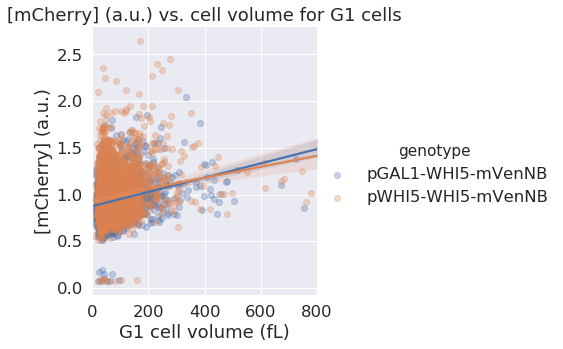

In [537]:
y=df1.nuclear_whi5==1
z=df1.gal_conc=='125uMGal'
sns.set(font_scale=1.5)
sns_plot = sns.lmplot(x='ellipse_volume', y='pixel_thresh_fluor_vals_av_c2', hue='genotype', data=df1[y&z], scatter_kws={'alpha': 0.3})
# plt.ylim(ymax=3000)
plt.xlim(xmin=0,xmax=800)
plt.ylabel('[mCherry] (a.u.)')
plt.xlabel('G1 cell volume (fL)')
plt.title('[mCherry] (a.u.) vs. cell volume for G1 cells')
sns_plot.savefig("/home/felix/Dropbox/19_whi5_dilution_paper/plots/correlations_perturbation/mCherry_conc_pert.png",dpi=500)

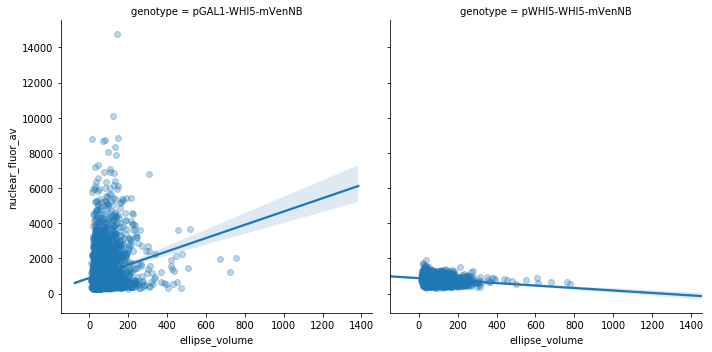

In [220]:
y=df1.nuclear_whi5==1
z=df1.gal_conc=='125uMGal'
sns_plot = sns.lmplot(x='ellipse_volume', y='nuclear_fluor_av', col='genotype', data=df1[y&z], scatter_kws={'alpha': 0.3})
# plt.ylim(ymax=3000)
sns_plot.savefig("./plots/timepoint_nucl_whi5_vol.png")

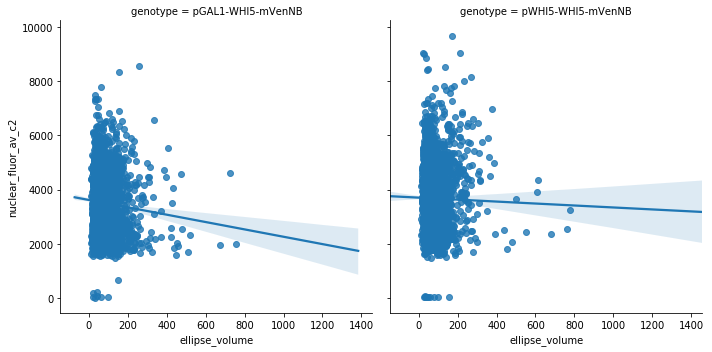

In [230]:
y=df1.nuclear_whi5==1
z=df1.gal_conc=='125uMGal'
sns.lmplot(x='ellipse_volume', y='nuclear_fluor_av_c2', col='genotype', data=df1[y&z])

(-0.24240977102150854, 2.0)

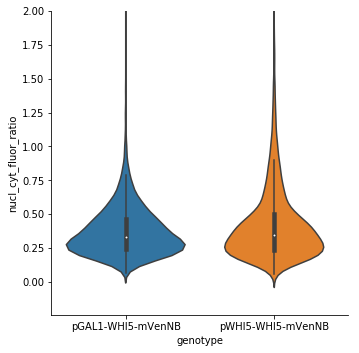

In [224]:
y=df1.nuclear_whi5==1
z=df1.gal_conc=='125uMGal'
sns.catplot(x='genotype', y='nucl_cyt_fluor_ratio',data=df1[y&z],kind='violin')
plt.ylim(ymax=2.0)

(0, 0.2)

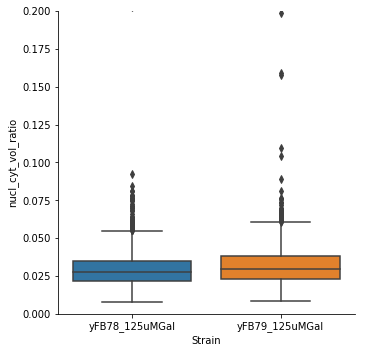

In [226]:
y=df1.nuclear_whi5==1
z=df1.gal_conc=='125uMGal'
sns.catplot(x='Strain', y='nucl_cyt_vol_ratio',data=df1[y&z], kind='box')
plt.ylim(ymax=0.2,ymin=0)

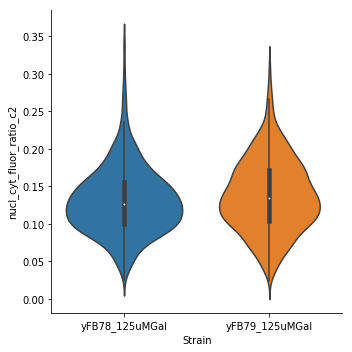

In [115]:
sns.catplot(x='Strain', y='nucl_cyt_fluor_ratio_c2',data=df1[df1['nuclear_whi5']==1],kind='violin')

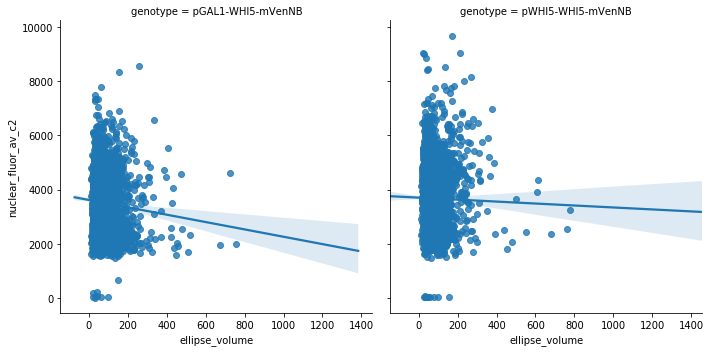

In [228]:
y=df1.nuclear_whi5==1
z=df1.gal_conc=='125uMGal'
sns.lmplot(x='ellipse_volume', y='nuclear_fluor_av_c2', col='genotype', data=df1[y&z])
# plt.ylim(ymax=3000)

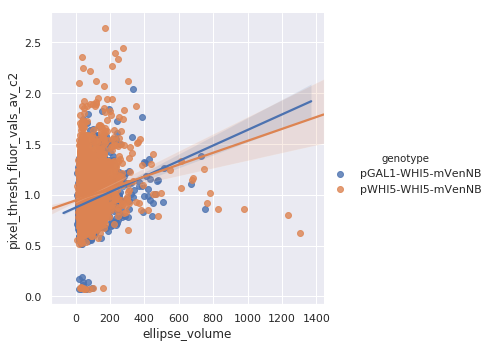

In [232]:
sns.set(font_scale=1.0)
y=df1.nuclear_whi5==1
z=df1.gal_conc=='125uMGal'
sns_plot=sns.lmplot(x='ellipse_volume', y='pixel_thresh_fluor_vals_av_c2', hue='genotype', data=df1[y&z])
sns_plot.savefig('./plots/av_c2_G1_cells_timepoint.png', dpi=500)

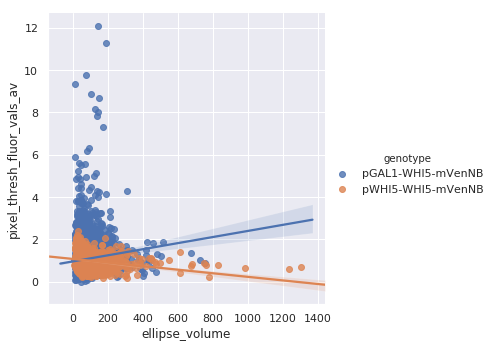

In [233]:
y=df1.nuclear_whi5==1
z=df1.gal_conc=='125uMGal'
sns_plot=sns.lmplot(x='ellipse_volume', y='pixel_thresh_fluor_vals_av', hue='genotype', data=df1[y&z])
# plt.ylim(ymax=5000)
plt.xlim(xmax=)
sns_plot.savefig('./plots/av_c1_G1_cells_timepoint.png', dpi=500)

yFB78_125uMGal pixel_thresh_fluor_vals_av
0.07767867060251403 0.13740284407512143
yFB79_125uMGal pixel_thresh_fluor_vals_av
-0.18553898388145232 -0.137215520357505
yFB78_125uMGal pixel_thresh_fluor_vals_av_c2
0.19310040183440366 0.25809565133849527
yFB79_125uMGal pixel_thresh_fluor_vals_av_c2
0.11566678103425286 0.21044772487286603
['Whi5-mVenNB, pGAL1-WHI5', 'Whi5-mVenNB, pWHI5-WHI5', 'mCherry, pGAL1-WHI5', 'mCherry, pWHI5-WHI5']


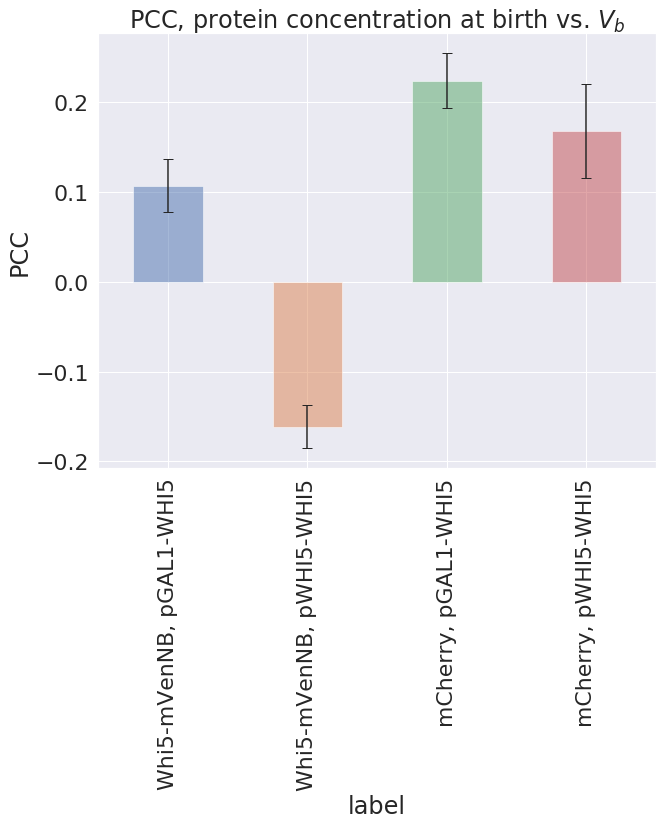

In [270]:
nucl_whi5 = 1
Strains = ['yFB78_125uMGal', 'yFB79_125uMGal']
genotype = ['pGAL1-WHI5', 'pWHI5-WHI5']
fluor = ['Whi5-mVenNB', 'mCherry']
x = 'ellipse_volume'
y=['pixel_thresh_fluor_vals_av', 'pixel_thresh_fluor_vals_av_c2']

vals = [[],[]]
label = []
for ind in range(len(y)):
    for ind1 in range(len(Strains)):
        print Strains[ind1], y[ind]
        v1=df1.Strain==Strains[ind1]
        v2=df1.nuclear_whi5 == 1
        label.append(fluor[ind]+', '+genotype[ind1])
        z = boot.ci((df1[v1 & v2][x],df1[v1 & v2][y[ind]]), scipy.stats.pearsonr)
        vals[0].append(scipy.stats.pearsonr(df1[v1&v2][x], df1[v1&v2][y[ind]])[0])
        vals[1].append([vals[0][-1]-z[0][0], z[1][0]-vals[0][-1]])
        print z[0][0], z[1][0]
temp1 = pd.DataFrame(columns = ['slope', 'label'])
temp1['slope'] = vals[0]
temp1['label'] = label
print label

sns.set(font_scale=2.0)
plot = temp1.plot(x='label',y='slope',kind='bar',yerr=zip(*vals[1]),legend=False,capsize=5.0,alpha=0.5, figsize=[10,8])
plt.title('PCC, protein concentration at birth vs. $V_b$')
# plt.xlabel('Measurement')
plt.ylabel('PCC')
fig=plot.get_figure()
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/correlations_perturbation/timepoint_pcc_comp_G1.png',bbox_inches='tight')

yFB78_125uMGal pixel_thresh_fluor_vals_av
0.0009392010231730609 0.0018825131613826305
yFB79_125uMGal pixel_thresh_fluor_vals_av
-0.0010161925936048378 -0.0006490144412962865
yFB78_125uMGal pixel_thresh_fluor_vals_av_c2
0.0006838177065412142 0.0009684569128919195
yFB79_125uMGal pixel_thresh_fluor_vals_av_c2
0.0003574853752686338 0.0008134200381966223
['Whi5-mVenNB, pGAL1-WHI5', 'Whi5-mVenNB, pWHI5-WHI5', 'mCherry, pGAL1-WHI5', 'mCherry, pWHI5-WHI5']


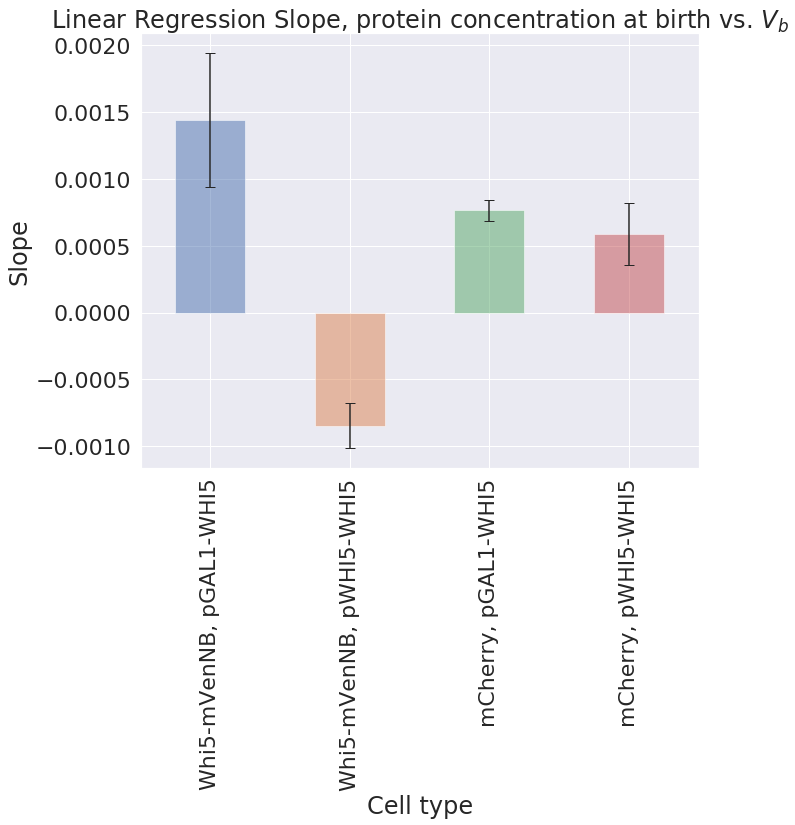

In [269]:
nucl_whi5 = 1
Strains = ['yFB78_125uMGal', 'yFB79_125uMGal']
genotype = ['pGAL1-WHI5', 'pWHI5-WHI5']
fluor = ['Whi5-mVenNB', 'mCherry']
x = 'ellipse_volume'
y=['pixel_thresh_fluor_vals_av', 'pixel_thresh_fluor_vals_av_c2']

vals = [[],[]]
label = []
for ind in range(len(y)):
    for ind1 in range(len(Strains)):
        print Strains[ind1], y[ind]
        v1=df1.Strain==Strains[ind1]
        v2=df1.nuclear_whi5 == 1
        label.append(fluor[ind]+', '+genotype[ind1])
        z = boot.ci((df1[v1 & v2][x],df1[v1 & v2][y[ind]]/np.mean(df1[v1&v2][y[ind]])), scipy.stats.linregress)
        vals[0].append(scipy.stats.linregress(df1[v1&v2][x], df1[v1&v2][y[ind]])[0])
        vals[1].append([vals[0][-1]-z[0][0], z[1][0]-vals[0][-1]])
        print z[0][0], z[1][0]
temp1 = pd.DataFrame(columns = ['slope', 'label'])
temp1['slope'] = vals[0]
temp1['label'] = label
print label

sns.set(font_scale=2.0)
plot = temp1.plot(x='label',y='slope',kind='bar',yerr=zip(*vals[1]),legend=False,capsize=5.0,alpha=0.5, figsize=[10,8])
plt.title('Linear Regression Slope, protein concentration at birth vs. $V_b$')
plt.xlabel('Cell type')
plt.ylabel('Slope')
fig=plot.get_figure()
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/correlations_perturbation/timepoint_slope_comp_G1.png',bbox_inches='tight')
# fig.savefig('./plots/timepoint_slope_comp_G1.png',bbox_inches='tight')

In [55]:
#strain_tracker = {'yFB78_125uMGal':'pGAL1-WHI5','yFB79_125uMGal':'pWHI5-WHI5','yFB79_800uMGal':'pWHI5-WHI5'}

In [57]:
# expt_ids = ['/190322_timepoint', '/190403_timepoint', '/190417_timepoint']

# for ind in range(len(expt_ids)):
#     expt_id=expt_ids[ind]
#     pickle_in = open("./expt_ids"+expt_id+'.pkl',"rb")
#     df1 = pickle.load(pickle_in)
#     df1['pixel_thresh_fluor_vals_av'] = df1['pixel_thresh_fluor_vals']/df1['pixel_thresh_vol']
#     df1['pixel_thresh_fluor_vals_av_c2'] = df1['pixel_thresh_fluor_vals_c2']/df1['pixel_thresh_vol']
#     df1['nucl_cyt_fluor_ratio'] = df1['nuclear_fluor_int']/df1['cytoplasmic_fluor_int']
#     df1['nucl_cyt_fluor_ratio_c2'] = df1['nuclear_fluor_int_c2']/df1['cytoplasmic_fluor_int_c2']
#     df1['nucl_cyt_vol_ratio'] =  df1['nuclear_vol']/(df1['pixel_thresh_vol']-df1['nuclear_vol'])
#     df1['zproj_fluor_vals_conc'] = df1['zproj_fluor_vals']/df1['ellipse_volume']
#     df1['expt_id'] = expt_id
#     df1['Genotype'] = [strain_tracker[obj] for obj in df1.Strain]
#     if ind==0:
#         df = df1.copy()
#     else:
#         df=df.append(df1)

In [259]:
df1.Strain.unique()

array(['yFB78_125uMGal', 'yFB79_125uMGal', 'yFB78_800uMGal',
       'yFB79_800uMGal'], dtype=object)

yFB78_125uMGal pixel_thresh_fluor_vals_av /190322_timepoint
0.023453160334076396 0.11375973092311041
yFB79_125uMGal pixel_thresh_fluor_vals_av /190322_timepoint
-0.32213293981733665 -0.22501932640960795
9.640414941344687 0.03630791203249249
CDF for this z value 1.0
This is a statistically significant difference
yFB78_125uMGal pixel_thresh_fluor_vals_av /190403_timepoint
0.08352582891819013 0.19842249783140717
yFB79_125uMGal pixel_thresh_fluor_vals_av /190403_timepoint
-0.5107025079184004 -0.40059118239024116
15.391877504277893 0.04128419307030668
CDF for this z value 1.0
This is a statistically significant difference
yFB78_125uMGal pixel_thresh_fluor_vals_av /190417_timepoint
0.08785720360457652 0.21871859177390612
yFB79_125uMGal pixel_thresh_fluor_vals_av /190417_timepoint
-0.3750288138680631 -0.2707207420513976
14.33106027730177 0.03469612383445115
CDF for this z value 1.0
This is a statistically significant difference
['190322, pGAL1-WHI5', '190322, pWHI5-WHI5', '190403, pGAL1-WHI5'

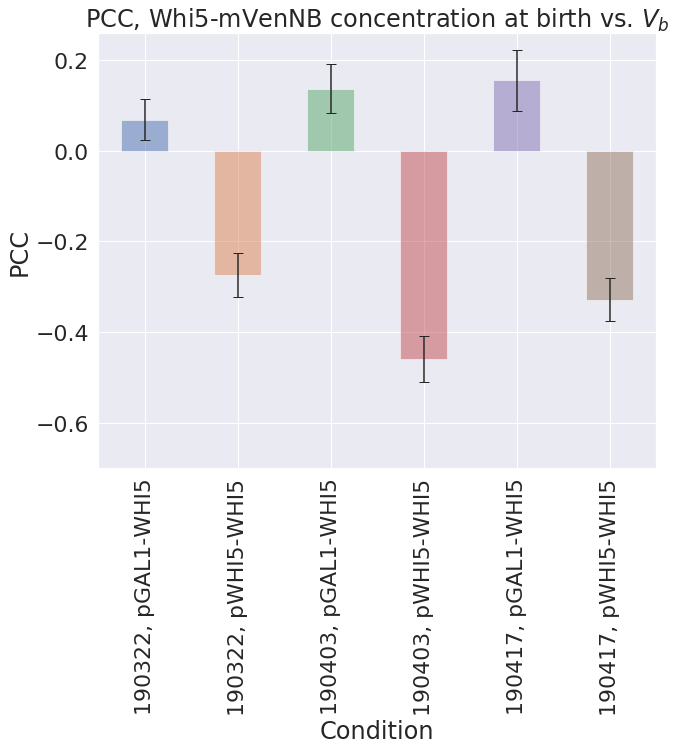

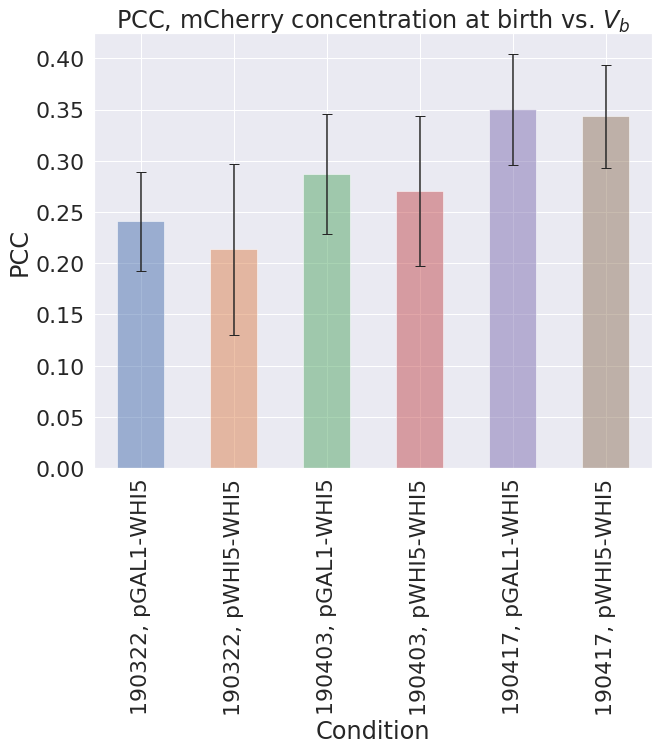

In [119]:
nucl_whi5 = 1
expt_ids = ['/190322_timepoint', '/190403_timepoint', '/190417_timepoint']
Strains = ['yFB78_125uMGal', 'yFB79_125uMGal']
genotype = ['pGAL1-WHI5-mVenNB', 'pWHI5-WHI5-mVenNB']
label1 = [r'$P_{GAL1}-WHI5$', r'$P_{WHI5}-WHI5$']
fluor = ['Whi5-mVenNB', 'mCherry']
x = 'pixel_thresh_vol'
y=['pixel_thresh_fluor_vals_av', 'pixel_thresh_fluor_vals_av_c2']

for ind in range(len(y)):
    vals = [[],[]]
    label = []
    for ind0 in range(len(expt_ids)):
        zvals=[]
        for ind1 in range(len(Strains)):
            print Strains[ind1], y[ind], expt_ids[ind0]
            v1=df1.Strain==Strains[ind1]
            v2=df1.nuclear_whi5 == 1
            v3 = df1.expt_id==expt_ids[ind0]
            label.append(expt_ids[ind0][1:7]+', '+genotype[ind1][:10])
            z = boot.ci((df1[v1 & v2&v3][x],df1[v1 & v2&v3][y[ind]]), scipy.stats.pearsonr)
            vals[0].append(scipy.stats.pearsonr(df1[v1&v2&v3][x], df1[v1&v2&v3][y[ind]])[0])
            vals[1].append([vals[0][-1]-z[0][0], z[1][0]-vals[0][-1]])
            zvals.append([np.arctanh(vals[0][-1]),1/np.sqrt(len(df1[v1&v2&v3][x])-3)])
            print z[0][0], z[1][0]
        zobs=np.absolute((zvals[0][0]-zvals[1][0])/(np.sqrt(zvals[0][1]**2+zvals[1][1]**2)))
        print zobs, np.sqrt(zvals[0][1]**2+zvals[1][1]**2)
        print 'CDF for this z value', scipy.stats.norm.cdf(zobs)
        if 0.025<scipy.stats.norm.cdf(zobs)<0.975:
            print 'This is not statistically significant'
        else:
        #     props = {'connectionstyle':'bar','arrowstyle':'-',\
        #                  'shrinkA':20,'shrinkB':20,'linewidth':2}
        #     ax.annotate('', xy=(0.0,0.5), xytext=(0.0,0.5), arrowprops=props)
            print 'This is a statistically significant difference'

    temp1 = pd.DataFrame(columns = ['slope', 'label'])
    temp1['slope'] = vals[0]
    temp1['label'] = label
    print label
    sns.set(font_scale=2.0)
    plot = temp1.plot(x='label',y='slope',kind='bar',yerr=zip(*vals[1]),legend=False,capsize=5.0,alpha=0.5, figsize=[10,8])
    plt.title('PCC, '+fluor[ind]+' concentration at birth vs. $V_b$')
    plt.xlabel('Condition')
    plt.ylabel('PCC')
    fig=plot.get_figure()
    if ind==0:
        plt.ylim(ymin=-0.7)
    fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/correlations_perturbation/PCC_comp_'+fluor[ind]+'.png',bbox_inches='tight')


yFB78_125uMGal pixel_thresh_fluor_vals_av /190322_timepoint
0.00014479696837947997 0.0006824796999928165
yFB78_125uMGal pixel_thresh_fluor_vals_av /190403_timepoint
0.00023994630866948293 0.0006257561754134186
yFB78_125uMGal pixel_thresh_fluor_vals_av /190417_timepoint
0.0006263744568619566 0.0019571537914493393
yFB79_125uMGal pixel_thresh_fluor_vals_av /190322_timepoint
-0.0003656078980954992 -0.00025972046981453093
yFB79_125uMGal pixel_thresh_fluor_vals_av /190403_timepoint
-0.0012347240009190927 -0.0008824905759999682
yFB79_125uMGal pixel_thresh_fluor_vals_av /190417_timepoint
-0.0006387957007229415 -0.0004221146956274223
['190322, pGAL1-WHI5', '190403, pGAL1-WHI5', '190417, pGAL1-WHI5', '190322, pWHI5-WHI5', '190403, pWHI5-WHI5', '190417, pWHI5-WHI5']
yFB78_125uMGal pixel_thresh_fluor_vals_av_c2 /190322_timepoint
0.0002015784463597028 0.00031130888821358547
yFB78_125uMGal pixel_thresh_fluor_vals_av_c2 /190403_timepoint
0.0004971478902805576 0.0008032161276284967
yFB78_125uMGal pixe

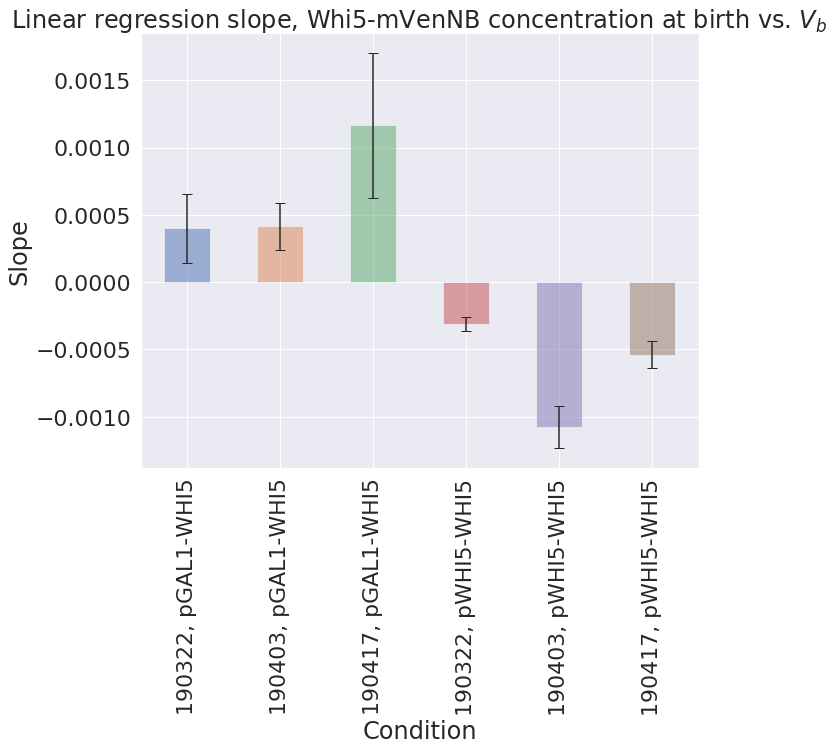

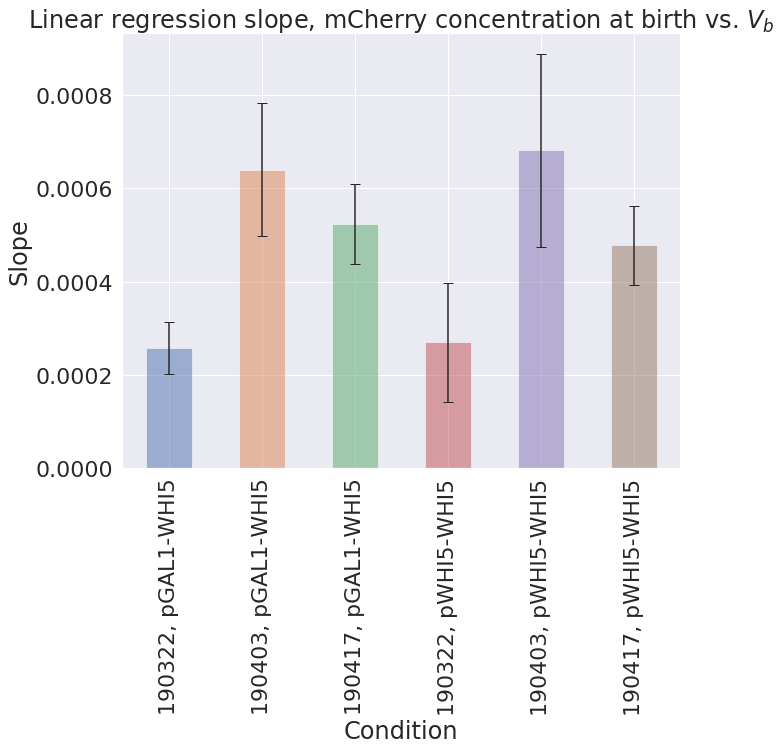

In [272]:
nucl_whi5 = 1
expt_ids = ['/190322_timepoint', '/190403_timepoint', '/190417_timepoint']
Strains = ['yFB78_125uMGal', 'yFB79_125uMGal']
genotype = ['pGAL1-WHI5-mVenNB', 'pWHI5-WHI5-mVenNB']
fluor = ['Whi5-mVenNB', 'mCherry']
x = 'pixel_thresh_vol'
y=['pixel_thresh_fluor_vals_av', 'pixel_thresh_fluor_vals_av_c2']

for ind in range(len(y)):
    vals = [[],[]]
    label = []
    for ind1 in range(len(Strains)):
        for ind0 in range(len(expt_ids)):
            print Strains[ind1], y[ind], expt_ids[ind0]
            v1=df1.Strain==Strains[ind1]
            v2=df1.nuclear_whi5 == 1
            v3 = df1.expt_id==expt_ids[ind0]
            label.append(expt_ids[ind0][1:7]+', '+genotype[ind1][:10])
            z = boot.ci((df1[v1 & v2&v3][x],df1[v1 & v2&v3][y[ind]]), scipy.stats.linregress)
            vals[0].append(scipy.stats.linregress(df1[v1&v2&v3][x], df1[v1&v2&v3][y[ind]])[0])
            vals[1].append([vals[0][-1]-z[0][0], z[1][0]-vals[0][-1]])
            print z[0][0], z[1][0]
    temp1 = pd.DataFrame(columns = ['slope', 'label'])
    temp1['slope'] = vals[0]
    temp1['label'] = label
    print label
    sns.set(font_scale=2.0)
    plot = temp1.plot(x='label',y='slope',kind='bar',yerr=zip(*vals[1]),legend=False,capsize=5.0,alpha=0.5, figsize=[10,8])
    plt.title('Linear regression slope, '+fluor[ind]+' concentration at birth vs. $V_b$')
    plt.xlabel('Condition')
    plt.ylabel('Slope')
    fig=plot.get_figure()
    fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/correlations_perturbation/LR_Slope_comp_'+fluor[ind]+'.png',bbox_inches='tight')